# Philadelphia Data Cleaning

In [279]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [1200]:
# Load data
phili_buildings_22 = pd.read_csv("/Users/chrismesfin/Desktop/Building Performance Paper/Raw_Data/Philidelphia/Properties_Reported_2022.csv")
phili_buildings_21 = pd.read_csv("/Users/chrismesfin/Desktop/Building Performance Paper/Raw_Data/Philidelphia/Properties_Reported_2021.csv")
phili_buildings_20 = pd.read_csv("/Users/chrismesfin/Desktop/Building Performance Paper/Raw_Data/Philidelphia/Properties_Reported_2020.csv")
phili_buildings_19 = pd.read_csv("/Users/chrismesfin/Desktop/Building Performance Paper/Raw_Data/Philidelphia/Properties_Reported_2019.csv")


In [1202]:
column_names = phili_buildings_22.columns
print(column_names)

Index(['X', 'Y', 'objectid', 'data_year', 'portfolio_manager_id',
       'philadelphia_building_id', 'street_address', 'property_name',
       'postal_code', 'num_of_buildings', 'year_built',
       'primary_prop_type_epa_calc', 'total_floor_area_bld_pk_ft2',
       'electric_use_kbtu', 'natural_gas_use_kbtu', 'fuel_oil_02_use_kbtu',
       'steam_use_kbtu', 'energy_star_score', 'site_eui_kbtuft2',
       'source_eui_kbtuft2', 'weather_norm_site_eui_kbtuft2',
       'weather_norm_sour_eui_kbtuft2', 'total_ghg_emissions_mtco2e',
       'water_use_all_kgal', 'district_chilled_water', 'water_score',
       'estar_certified', 'compliance_type', 'benchmarking_status', 'x_coord',
       'y_coord'],
      dtype='object')


In [1204]:
phili_buildings_22["benchmarking_status"].unique()

array(['Complied', 'Voluntarily Complied', ' '], dtype=object)

**Exaustive List of Variable Names and Basic Information** 

`X`- Latitute of Building (Dropped Due to Missingness)

`Y`- Longitude of Building (Dropped Due to Missingness)

`objectid`- Index of Building

`data_year`-Year of Data Collection

`portfolio_manager_id`- ID on EPA Portfolio Manager

`philadelphia_building_id` - Building ID given by Philidelphia Government?

`street_address` - Street Address of Building

`property_name` - Name of property (given by property owner)

`postal_code` - Postal Code of Building

`num_of_buildings`- Number of Buildings Under a certain profile

`year_built` - The Year the Building was Built

`primary_prop_type_epa_calc` - Builing Type as enter by Builing Owner

`total_floor_area_bld_pk_ft2` - Total Floor area of all Buildings being Reported by Building Owner

`electric_use_kbtu` - Total Electricity use in kilo British thermal units

`natural_gas_use_kbtu` - Natural Gas use in kilo British thermal units

`fuel_oil_02_use_kbtu` - Fuel/Oil/O2 use in kilo British thermal units

`steam_use_kbtu` - Steam use in kilo British thermal units

`energy_star_score` - Energy Star Score given by the EPA

`site_eui_kbtuft2` - Site Energy Use Intensity in kilo British thermal units/square foot

`source_eui_kbtuft2` - Source Energy Use Intensity in kilo British thermal units/square foot

`weather_norm_site_eui_kbtuft2` - Weather Normalized Site Energy Use Intensity in kilo British thermal units/square foot

`weather_norm_sour_eui_kbtuft2` - Weather Normalized Source Energy Use Intensity in kilo British thermal units/square foot

`total_ghg_emissions_mtco2e` - Greenhouse Gas emissions in Metric tons of carbon dioxide equivalent

`water_use_all_kgal` - Water Use in Kilogallons

`district_chilled_water` - N/A

`water_score` - N/A

`estar_certified` - N/A

`compliance_type`- Required Compliance or Voluntary Compliance

`benchmarking_status` - Complied or Voluntarily Complied

`x_coord` - Latitude

`y_coord` - Longitude

## Pre Preprocessing Data Summary

In [1208]:
print(phili_buildings_22.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1363 entries, 0 to 1362
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   X                              1304 non-null   float64
 1   Y                              1304 non-null   float64
 2   objectid                       1363 non-null   int64  
 3   data_year                      1363 non-null   int64  
 4   portfolio_manager_id           1363 non-null   int64  
 5   philadelphia_building_id       1363 non-null   object 
 6   street_address                 1363 non-null   object 
 7   property_name                  1363 non-null   object 
 8   postal_code                    1363 non-null   object 
 9   num_of_buildings               1363 non-null   int64  
 10  year_built                     1363 non-null   int64  
 11  primary_prop_type_epa_calc     1363 non-null   object 
 12  total_floor_area_bld_pk_ft2    1363 non-null   f

In [1210]:
phili_buildings_22.describe()

X            Y    objectid  data_year  portfolio_manager_id  \
count  1304.000000  1304.000000  1363.00000     1363.0          1.363000e+03   
mean    -75.148671    39.987014   682.00000     2022.0          7.014699e+06   
std       0.061777     0.051157   393.60852        0.0          6.425961e+06   
min     -75.275052    39.864514     1.00000     2022.0          0.000000e+00   
25%     -75.182810    39.950967   341.50000     2022.0          3.656472e+06   
50%     -75.161765    39.974470   682.00000     2022.0          4.456653e+06   
75%     -75.134930    40.021369  1022.50000     2022.0          6.066631e+06   
max     -74.961629    40.133182  1363.00000     2022.0          3.306587e+07   

       num_of_buildings   year_built  total_floor_area_bld_pk_ft2  \
count       1363.000000  1363.000000                 1.363000e+03   
mean           1.724138  1964.128393                 2.053549e+05   
std            6.282874    65.048330                 4.607719e+05   
min            0.000000     0.000000                 0.000000e+00   
25%            1.000000  1931.000000                 6.740000e+04   
50%            1.000000  1970.000000                 1.019760e+05   
75%            1.000000  2000.000000                 2.104095e+05   
max          180.000000  2023.000000                 1.300000e+07   

       electric_use_kbtu  natural_gas_use_kbtu  fuel_oil_02_use_kbtu  \
count       1.363000e+03          1.363000e+03          1.363000e+03   
mean        9.983390e+06          5.425402e+06          2.512331e+05   
std         3.753579e+07          1.982512e+07          1.312712e+06   
min         0.000000e+00          0.000000e+00          0.000000e+00   
25%         1.508665e+06          9.214050e+04          0.000000e+00   
50%         3.379208e+06          1.705499e+06          0.000000e+00   
75%         8.443470e+06          4.838177e+06          0.000000e+00   
max         9.741270e+08          5.723479e+08          1.781581e+07   

       steam_use_kbtu  energy_star_score  site_eui_kbtuft2  \
count    1.363000e+03        1363.000000       1363.000000   
mean     3.187079e+06          36.016141         82.979384   
std      4.489491e+07          34.878493         65.970550   
min      0.000000e+00           0.000000          0.000000   
25%      0.000000e+00           0.000000         41.350000   
50%      0.000000e+00          29.000000         66.900000   
75%      0.000000e+00          68.500000        101.200000   
max      1.610362e+09         100.000000        437.200000   

       source_eui_kbtuft2  weather_norm_site_eui_kbtuft2  \
count         1363.000000                    1363.000000   
mean           160.132282                      80.939985   
std            125.908595                      66.307468   
min              0.000000                       0.000000   
25%             88.300000                      39.300000   
50%            126.000000                      66.200000   
75%            190.350000                     103.450000   
max           1052.400000                     429.600000   

       weather_norm_sour_eui_kbtuft2  total_ghg_emissions_mtco2e  \
count                    1363.000000                 1363.000000   
mean                      151.348569                 1427.056640   
std                       126.004771                 6285.898824   
min                         0.000000                    0.000000   
25%                        80.850000                  259.800000   
50%                       124.300000                  540.200000   
75%                       184.100000                 1160.750000   
max                      1052.400000               192861.200000   

       water_use_all_kgal  district_chilled_water      x_coord      y_coord  
count         1363.000000            1.363000e+03  1363.000000  1363.000000  
mean          6275.480411            4.547431e+05   -75.093477    39.619872  
std          29281.745611            3.695518e+06     2.036447     6.324388  


In [1212]:
phili_buildings_22["num_of_buildings"].sum()

2350

We have approximately 2350 buildings that have complied with the Philidelphia Building Energy Performance Program in 2022. Before doing further analysis we will check for missingness before we continue exploring the data.

## Check for Missingness

In [1216]:
phili_buildings_22.isnull().sum()

X                                59
Y                                59
objectid                          0
data_year                         0
portfolio_manager_id              0
philadelphia_building_id          0
street_address                    0
property_name                     0
postal_code                       0
num_of_buildings                  0
year_built                        0
primary_prop_type_epa_calc        0
total_floor_area_bld_pk_ft2       0
electric_use_kbtu                 0
natural_gas_use_kbtu              0
fuel_oil_02_use_kbtu              0
steam_use_kbtu                    0
energy_star_score                 0
site_eui_kbtuft2                  0
source_eui_kbtuft2                0
weather_norm_site_eui_kbtuft2     0
weather_norm_sour_eui_kbtuft2     0
total_ghg_emissions_mtco2e        0
water_use_all_kgal                0
district_chilled_water            0
water_score                       0
estar_certified                   0
compliance_type             

The above suggest that we only have missingness in our latitude and longitude but it seems like city managers or the EPA Energy Star Platform may have automatically imputed 0's for missing values. A review of the available variables tells us that 0 is not a reasonable response so we can assume any observation that is equal to zero is actually a missing value. We will also drop `X`, `Y`, `x_cord`, and `y_cord` with the option of adding these variables back in if we want to do any kind of geospatial analysis.

In [1219]:
phili_buildings_22_nans = phili_buildings_22.replace(0, np.nan)

In [1221]:
phili_buildings_22_clean = phili_buildings_22_nans.drop(columns = ['X', 'Y', 'x_coord', 'y_coord'])

In [1223]:
phili_buildings_22_nans.isnull().sum()

X                                  59
Y                                  59
objectid                            0
data_year                           0
portfolio_manager_id                1
philadelphia_building_id            0
street_address                      0
property_name                       0
postal_code                         0
num_of_buildings                   40
year_built                          1
primary_prop_type_epa_calc          0
total_floor_area_bld_pk_ft2         1
electric_use_kbtu                   1
natural_gas_use_kbtu              253
fuel_oil_02_use_kbtu             1289
steam_use_kbtu                   1196
energy_star_score                 426
site_eui_kbtuft2                    1
source_eui_kbtuft2                  1
weather_norm_site_eui_kbtuft2      55
weather_norm_sour_eui_kbtuft2      83
total_ghg_emissions_mtco2e          2
water_use_all_kgal                120
district_chilled_water           1317
water_score                         0
estar_certif

In [1225]:
phili_buildings_22_clean.isnull().sum()

objectid                            0
data_year                           0
portfolio_manager_id                1
philadelphia_building_id            0
street_address                      0
property_name                       0
postal_code                         0
num_of_buildings                   40
year_built                          1
primary_prop_type_epa_calc          0
total_floor_area_bld_pk_ft2         1
electric_use_kbtu                   1
natural_gas_use_kbtu              253
fuel_oil_02_use_kbtu             1289
steam_use_kbtu                   1196
energy_star_score                 426
site_eui_kbtuft2                    1
source_eui_kbtuft2                  1
weather_norm_site_eui_kbtuft2      55
weather_norm_sour_eui_kbtuft2      83
total_ghg_emissions_mtco2e          2
water_use_all_kgal                120
district_chilled_water           1317
water_score                         0
estar_certified                     0
compliance_type                     0
benchmarking

In [1227]:
phili_buildings_22_nans[phili_buildings_22_nans["num_of_buildings"].isnull()]

X          Y  objectid  data_year  portfolio_manager_id  \
43   -75.163705  39.944229        44       2022            20825770.0   
112         NaN        NaN       113       2022             4968782.0   
192  -75.204928  39.968711       193       2022            19398390.0   
201  -75.164421  40.041050       202       2022            20470840.0   
204  -74.972454  40.101602       205       2022             3788380.0   
211         NaN        NaN       212       2022             1516994.0   
286  -75.007555  40.043608       287       2022             3683713.0   
287  -75.227472  39.933239       288       2022             4991802.0   
288  -75.074803  40.029911       289       2022             3330753.0   
297  -75.248128  39.886315       298       2022             6814771.0   
371  -75.171688  39.980692       372       2022             5889782.0   
427  -75.162966  39.915072       428       2022             3330815.0   
469         NaN        NaN       470       2022             4051987.0   
490  -75.226981  39.923962       491       2022             3330797.0   
499  -75.115132  40.042554       500       2022             5050684.0   
502  -75.211428  39.948629       503       2022             3788376.0   
509  -75.155396  39.912985       510       2022             5053754.0   
613  -75.214982  40.004391       614       2022             4965649.0   
627  -75.064109  39.997112       628       2022             3776486.0   
650  -74.992737  40.090060       651       2022             3668376.0   
691  -75.158296  39.984970       692       2022             3330865.0   
710  -75.027039  40.078032       711       2022             3878985.0   
727  -75.165736  39.950628       728       2022             4135023.0   
753         NaN        NaN       754       2022             5904300.0   
767  -75.160260  39.950431       768       2022            21673231.0   
801  -75.164991  39.945541       802       2022             2851911.0   
833  -75.135068  40.015573       834       2022             3884096.0   
852  -75.197023  39.956970       853       2022             3479994.0   
863  -75.070642  39.991991       864       2022             6435184.0   
889  -75.171037  39.944109       890       2022             3862680.0   
911  -75.120410  40.035803       912       2022             3875831.0   
946  -75.088945  40.044379       947       2022            11286556.0   
947  -75.118835  40.008759       948       2022             4077977.0   
972  -75.154983  39.952400       973       2022             3891105.0   
1010 -75.247648  39.886847      1011       2022             6392950.0   
1033 -75.157474  39.950087      1034       2022             3891006.0   
1040        NaN        NaN      1041       2022             3895425.0   
1044 -75.154946  39.944983      1045       2022             4052093.0   
1226 -75.174195  39.962664      1227       2022             7065543.0   
1362 -75.227494  40.043992      1363       2022                   NaN   

                               philadelphia_building_id  \
43                                            881008215   
112                                                       
192                                           881822370   
201                                           881057500   
204                                           778144000   
211                                           883002510   
286                                           884260000   
287                                           881445450   
288                                           786076410   
297                                           883745200   
371                                           886761175   
427                                           781609400   
469                                           883102000   
490                                           783130400   
499                                           881216000   
502                                                       
509              

In [1229]:
phili_buildings_22_nans["num_of_buildings"].unique()

array([  1.,   2.,  10.,  81.,   3.,  36.,  nan,   5.,   4.,   6.,   9.,
       180.,  29.,  15.,   7.,  31.,  26.,  18.,  30.,  17.,  16.,  19.,
        20.,  11.,  25.,   8.,  21.,  83.])

In [1231]:
# Frequency table
frequency_table = phili_buildings_22_nans["num_of_buildings"].value_counts().reset_index()
frequency_table.columns = ['Number of Buildings', 'Frequency']
frequency_table = frequency_table.sort_values(by='Number of Buildings')
frequency_table['Proportion of Total'] = (frequency_table['Frequency'] / frequency_table['Frequency'].sum()) * 100
print(frequency_table)


    Number of Buildings  Frequency  Proportion of Total
0                   1.0       1171            88.510960
1                   2.0         56             4.232804
2                   3.0         30             2.267574
3                   4.0         17             1.284958
5                   5.0          7             0.529101
4                   6.0          8             0.604686
8                   7.0          4             0.302343
13                  8.0          1             0.075586
7                   9.0          4             0.302343
6                  10.0          6             0.453515
15                 11.0          1             0.075586
10                 15.0          2             0.151172
12                 16.0          1             0.075586
18                 17.0          1             0.075586
21                 18.0          1             0.075586
17                 19.0          1             0.075586
16                 20.0          1             0

In [1233]:
phili_buildings_22_clean["num_of_buildings"] = phili_buildings_22_clean["num_of_buildings"].fillna(1)

The above shows that if we exclude buildings that did not report the number of buildings in their profile almost 90% of all buildings report only 1 building in their profile. Thus we will impute the mode for `num_of_buildings`.

In [1236]:
large_num_build = phili_buildings_22[phili_buildings_22["num_of_buildings"] == 180]
pd.set_option('display.max_rows', None) 
pd.set_option('display.max_columns', None)
large_num_build

X          Y  objectid  data_year  portfolio_manager_id  \
69 -75.186393  39.952126        70       2022               3634188   

   philadelphia_building_id  street_address               property_name  \
69                           3101 Walnut St  University of Pennsylvania   

   postal_code  num_of_buildings  year_built primary_prop_type_epa_calc  \
69       19104               180        1873         College/University   

    total_floor_area_bld_pk_ft2  electric_use_kbtu  natural_gas_use_kbtu  \
69                   13000000.0        974127023.6            20101418.0   

    fuel_oil_02_use_kbtu  steam_use_kbtu  energy_star_score  site_eui_kbtuft2  \
69                   0.0    1.610362e+09                  0             200.4   

    source_eui_kbtuft2  weather_norm_site_eui_kbtuft2  \
69               360.5                          198.3   

    weather_norm_sour_eui_kbtuft2  total_ghg_emissions_mtco2e  \
69                          217.9                    192861.2   

    water_use_all_kgal  district_chilled_water water_score estar_certified  \
69            730268.5                     0.0                          No   

        compliance_type benchmarking_status    x_coord    y_coord  
69  Required Compliance            Complied -75.195286  39.948834

The largest building manager in Philidelphia is UPenn!

There also seems to be row that was recorded incorrectly in the 2022 that is recording NaNs across multiple different columns. We will remove this row.

In [1240]:
phili_buildings_22_clean = phili_buildings_22_clean.drop(index = 1362)

We still have elements of missingness for `natural_gas_use_kbtu`, `fuel_oil_02_use_kbtu`, `steam_use_kbtu`, `energy_star_score`, `weather_norm_site_eui_kbtuft2`, `weather_norm_sour_eui_kbtuft2`, `total_ghg_emissions_mtco2e`, `water_use_all_kgal`, and `district_chilled_water`. We decide to drop all of these columns outside of the `total_ghg_emissions_mtco2e` column as the missingness amounts to 1 row and is most likely due to the fact that this particular row engaged in voluntary compliance so its requirements for reporting may not have been as strict as a set of buildings that had required compliance. We can look at this column in depth below. Additionally, for the purposes of our analysis we will remove instances of voluntary compliance because this violates the assumption of the treatment (buildings being required to regulate) being determined by the threshold (building size) for our regression discontinuity design.

In [1243]:
phili_buildings_22_clean[phili_buildings_22_clean["total_ghg_emissions_mtco2e"].isnull()]

objectid  data_year  portfolio_manager_id philadelphia_building_id  \
1304      1305       2022            26648895.0                881179600   

          street_address  property_name postal_code  num_of_buildings  \
1304  1906-22 TREMONT ST  Revere Villas       19115               1.0   

      year_built primary_prop_type_epa_calc  total_floor_area_bld_pk_ft2  \
1304      2016.0        Multifamily Housing                      23112.0   

      electric_use_kbtu  natural_gas_use_kbtu  fuel_oil_02_use_kbtu  \
1304           707819.4             3850501.7                   NaN   

      steam_use_kbtu  energy_star_score  site_eui_kbtuft2  source_eui_kbtuft2  \
1304             NaN                NaN             197.2               260.7   

      weather_norm_site_eui_kbtuft2  weather_norm_sour_eui_kbtuft2  \
1304                          210.1                          126.8   

      total_ghg_emissions_mtco2e  water_use_all_kgal  district_chilled_water  \
1304                         NaN               662.7                     NaN   

     water_score estar_certified       compliance_type   benchmarking_status  
1304                          No  Voluntary Compliance  Voluntarily Complied

For now we drop the row and the otehr columns that we still have missingness. We may revist these columns in the future.

In [1246]:
phili_buildings_22_clean = phili_buildings_22_clean.drop(index = 1304)
phili_buildings_22_clean = phili_buildings_22_clean.drop(columns = ['natural_gas_use_kbtu', 'fuel_oil_02_use_kbtu', 'steam_use_kbtu', 'energy_star_score', 'weather_norm_site_eui_kbtuft2', 'weather_norm_sour_eui_kbtuft2', 'water_use_all_kgal', 'district_chilled_water'])


In [1248]:
phili_buildings_22_clean.isnull().sum()

objectid                       0
data_year                      0
portfolio_manager_id           0
philadelphia_building_id       0
street_address                 0
property_name                  0
postal_code                    0
num_of_buildings               0
year_built                     0
primary_prop_type_epa_calc     0
total_floor_area_bld_pk_ft2    0
electric_use_kbtu              0
site_eui_kbtuft2               0
source_eui_kbtuft2             0
total_ghg_emissions_mtco2e     0
water_score                    0
estar_certified                0
compliance_type                0
benchmarking_status            0
dtype: int64

We also drop `water_score` and `estar_certified` as they are not relevant to our analysis.

In [1251]:
phili_buildings_22_clean = phili_buildings_22_clean.drop(columns = ['water_score', 'estar_certified'])


## Additional Preprocessing

We need to handle the building size variable because rather than reporting an accurate measure for building size it aggregates acroos the entire profile. This may effect our analysis by disguising buildings that are just around the threshold as massive which weakens our analysis. We will handle each instance in which there is more than one building that is a part of the profile starting with the largest profile.

In [1461]:
frequency_table = phili_buildings_22_clean["num_of_buildings"].value_counts().reset_index()
frequency_table.columns = ['Number of Buildings', 'Frequency']
frequency_table = frequency_table.sort_values(by='Number of Buildings')
frequency_table['Proportion of Total'] = (frequency_table['Frequency'] / frequency_table['Frequency'].sum()) * 100
frequency_table

Number of Buildings  Frequency  Proportion of Total
0                  1.0       2389                100.0

In [1257]:
large_num_build = phili_buildings_22_clean[phili_buildings_22_clean["num_of_buildings"] == 2.0]
pd.set_option('display.max_rows', None) 
pd.set_option('display.max_columns', None)
large_num_build

objectid  data_year  portfolio_manager_id  \
4            5       2022             3635022.0   
14          15       2022             3673577.0   
15          16       2022             3782267.0   
32          33       2022            15115902.0   
41          42       2022            23307135.0   
51          52       2022             3690153.0   
57          58       2022             3762536.0   
97          98       2022             3782254.0   
151        152       2022             3762530.0   
199        200       2022             3639777.0   
263        264       2022             5013003.0   
267        268       2022             3859497.0   
295        296       2022             3773988.0   
313        314       2022             4998219.0   
328        329       2022             4830328.0   
348        349       2022             3762549.0   
394        395       2022             3569731.0   
424        425       2022             3810865.0   
465        466       2022             3815264.0   
467        468       2022             5015889.0   
496        497       2022             5013007.0   
524        525       2022             3687689.0   
535        536       2022             4457858.0   
579        580       2022             5020503.0   
598        599       2022             4123949.0   
618        619       2022             5976288.0   
629        630       2022             4096814.0   
640        641       2022             3782240.0   
648        649       2022             3829101.0   
651        652       2022             5002154.0   
674        675       2022             4694204.0   
678        679       2022             3694569.0   
769        770       2022             3893215.0   
787        788       2022             4970926.0   
806        807       2022             3669125.0   
844        845       2022             4959919.0   
893        894       2022             6413514.0   
898        899       2022             3782718.0   
902        903       2022             3679271.0   
935        936       2022             3575688.0   
948        949       2022             3681375.0   
977        978       2022             4053404.0   
1005      1006       2022             5002488.0   
1030      1031       2022             7717971.0   
1090      1091       2022             3958192.0   
1095      1096       2022            20040915.0   
1150      1151       2022            28763941.0   
1163      1164       2022             3774259.0   
1165      1166       2022             3875374.0   
1201      1202       2022            21529135.0   
1220      1221       2022             6766532.0   
1244      1245       2022            10471914.0   
1254      1255       2022             7118556.0   
1329      1330       2022            27985670.0   
1338      1339       2022            26721377.0   
1345      1346       2022            27391190.0   

               philadelphia_building_id           street_address  \
4                                                  3501 CEDAR ST   
14                            882125404     2200 WHEATSHEAF LANE   
15                            884220500   2001 north 59th street   
32                            886671100           1315 N. 8th St   
41                            888051584      285 St. James Place   
51                            884282000          10905 Dutton Rd   
57                            774530510           3301 MARKET ST   
97                            884463825                84 S PIER   
151   774526000 ; 774525100 ; 885633160        3126-38 MARKET ST   
199                           776545000   2300 W WESTMORELAND ST   
263                           881079800            450 DOMINO LN   
267                           771251500           2901 S 10TH ST   
295                           777247000        1001 W LUZERNE ST   
313                           881090500           7949 RIDGE AVE   
328     782513700; 782513701; 888073174    2500 SPRING GARDEN ST   
348       

If we duplicate rows we will have to set `num_of_buildings` to 1 for all of the duplicated rows, fix `total_floor_area_bld_pk_ft2`, `electric_use_kbtu`, `total_ghg_emissions_mtco2e`, to fix these we will just divide by the number of buildings in the profile.

In [1260]:
#Set Number of Buildings to 1 and remember the total to be 180
phili_buildings_22_clean.loc[69, 'num_of_buildings'] = 1

In [1262]:
#Fix Variables
phili_buildings_22_clean.loc[69, 'total_floor_area_bld_pk_ft2'] = 13000000.0/180
phili_buildings_22_clean.loc[69, 'electric_use_kbtu'] = 974127023.6/180
phili_buildings_22_clean.loc[69, 'total_ghg_emissions_mtco2e'] = 192861.2/180

In [1264]:
#Duplicate Row
duplication_row = phili_buildings_22_clean.loc[[69]]

duplicates_180 = pd.concat([duplication_row]*179, ignore_index=True)

phili_buildings_22_clean = pd.concat([phili_buildings_22_clean, duplicates_180], ignore_index = True)

phili_buildings_22_clean


objectid  data_year  portfolio_manager_id  \
0            1       2022            23418185.0   
1            2       2022             5921759.0   
2            3       2022            22425337.0   
3            4       2022             6396423.0   
4            5       2022             3635022.0   
5            6       2022             3773860.0   
6            7       2022            17774763.0   
7            8       2022            21547738.0   
8            9       2022             5043039.0   
9           10       2022             3782840.0   
10          11       2022             2887841.0   
11          12       2022             3751369.0   
12          13       2022             1060573.0   
13          14       2022             3696167.0   
14          15       2022             3673577.0   
15          16       2022             3782267.0   
16          17       2022             3824196.0   
17          18       2022             4542636.0   
18          19       2022             4471836.0   
19          20       2022             3966890.0   
20          21       2022             4870458.0   
21          22       2022             5935853.0   
22          23       2022             3958205.0   
23          24       2022             4457702.0   
24          25       2022             5018892.0   
25          26       2022             5004296.0   
26          27       2022            30267658.0   
27          28       2022            16126996.0   
28          29       2022            21642096.0   
29          30       2022            21671936.0   
30          31       2022            20989884.0   
31          32       2022            19427862.0   
32          33       2022            15115902.0   
33          34       2022            20838148.0   
34          35       2022             7554827.0   
35          36       2022            20839494.0   
36          37       2022            18968756.0   
37          38       2022            17792850.0   
38          39       2022            20839104.0   
39          40       2022            20965467.0   
40          41       2022            20660543.0   
41          42       2022            23307135.0   
42          43       2022            20965469.0   
43          44       2022            20825770.0   
44          45       2022             3783055.0   
45          46       2022            17710730.0   
46          47       2022            16905021.0   
47          48       2022            13055762.0   
48          49       2022             4830325.0   
49          50       2022             9867017.0   
50          51       2022             3668944.0   
51          52       2022             3690153.0   
52          53       2022               29230.0   
53          54       2022            15658881.0   
54          55       2022             5063279.0   
55          56       2022             3892261.0   
56          57       2022             4961098.0   
57          58       2022             3762536.0   
58          59       2022             4426032.0   
59          60       2022             4426304.0   
60          61       2022             4830371.0   
61          62       2022             4155239.0   
62          63       2022             1946616.0   
63          64       2022             3862659.0   
64          65       2022             3856018.0   
65          66       2022             1328441.0   
66          67       2022             3970936.0   
67          68       2022             2867268.0   
68          69       2022             2848103.0   
69          70       2022             3634188.0   
70          71       2022             3963378.0   
71          72       2022             3983897.0   
72          73       2022             3762540.0   
73          74       2022             3876067.0   
74          75       2022             3983809.0   
75          76       2022             3643275.0   
76          77       2022             4449356.0   
77          78       2022   

We will repeat this process and update our frequency table above.

In [1267]:
large_num_build

objectid  data_year  portfolio_manager_id  \
4            5       2022             3635022.0   
14          15       2022             3673577.0   
15          16       2022             3782267.0   
32          33       2022            15115902.0   
41          42       2022            23307135.0   
51          52       2022             3690153.0   
57          58       2022             3762536.0   
97          98       2022             3782254.0   
151        152       2022             3762530.0   
199        200       2022             3639777.0   
263        264       2022             5013003.0   
267        268       2022             3859497.0   
295        296       2022             3773988.0   
313        314       2022             4998219.0   
328        329       2022             4830328.0   
348        349       2022             3762549.0   
394        395       2022             3569731.0   
424        425       2022             3810865.0   
465        466       2022             3815264.0   
467        468       2022             5015889.0   
496        497       2022             5013007.0   
524        525       2022             3687689.0   
535        536       2022             4457858.0   
579        580       2022             5020503.0   
598        599       2022             4123949.0   
618        619       2022             5976288.0   
629        630       2022             4096814.0   
640        641       2022             3782240.0   
648        649       2022             3829101.0   
651        652       2022             5002154.0   
674        675       2022             4694204.0   
678        679       2022             3694569.0   
769        770       2022             3893215.0   
787        788       2022             4970926.0   
806        807       2022             3669125.0   
844        845       2022             4959919.0   
893        894       2022             6413514.0   
898        899       2022             3782718.0   
902        903       2022             3679271.0   
935        936       2022             3575688.0   
948        949       2022             3681375.0   
977        978       2022             4053404.0   
1005      1006       2022             5002488.0   
1030      1031       2022             7717971.0   
1090      1091       2022             3958192.0   
1095      1096       2022            20040915.0   
1150      1151       2022            28763941.0   
1163      1164       2022             3774259.0   
1165      1166       2022             3875374.0   
1201      1202       2022            21529135.0   
1220      1221       2022             6766532.0   
1244      1245       2022            10471914.0   
1254      1255       2022             7118556.0   
1329      1330       2022            27985670.0   
1338      1339       2022            26721377.0   
1345      1346       2022            27391190.0   

               philadelphia_building_id           street_address  \
4                                                  3501 CEDAR ST   
14                            882125404     2200 WHEATSHEAF LANE   
15                            884220500   2001 north 59th street   
32                            886671100           1315 N. 8th St   
41                            888051584      285 St. James Place   
51                            884282000          10905 Dutton Rd   
57                            774530510           3301 MARKET ST   
97                            884463825                84 S PIER   
151   774526000 ; 774525100 ; 885633160        3126-38 MARKET ST   
199                           776545000   2300 W WESTMORELAND ST   
263                           881079800            450 DOMINO LN   
267                           771251500           2901 S 10TH ST   
295                           777247000        1001 W LUZERNE ST   
313                           881090500           7949 RIDGE AVE   
328     782513700; 782513701; 888073174    2500 SPRING GARDEN ST   
348       

In [1269]:
#Set Number of Buildings to 1 and remember the total to be 83
phili_buildings_22_clean.loc[1360, 'num_of_buildings'] = 1

In [1271]:
#Fix Variables
phili_buildings_22_clean.loc[1360, 'total_floor_area_bld_pk_ft2'] = 130000.0/83
phili_buildings_22_clean.loc[1360, 'electric_use_kbtu'] = 5169797.6/83
phili_buildings_22_clean.loc[1360, 'total_ghg_emissions_mtco2e'] = 499.6/83

In [1273]:
#Duplicate Row
duplication_row = phili_buildings_22_clean.loc[[1360]]

duplicates_83 = pd.concat([duplication_row]*82, ignore_index=True)

phili_buildings_22_clean = pd.concat([phili_buildings_22_clean, duplicates_83], ignore_index = True)

Again!

In [1276]:
large_num_build

objectid  data_year  portfolio_manager_id  \
4            5       2022             3635022.0   
14          15       2022             3673577.0   
15          16       2022             3782267.0   
32          33       2022            15115902.0   
41          42       2022            23307135.0   
51          52       2022             3690153.0   
57          58       2022             3762536.0   
97          98       2022             3782254.0   
151        152       2022             3762530.0   
199        200       2022             3639777.0   
263        264       2022             5013003.0   
267        268       2022             3859497.0   
295        296       2022             3773988.0   
313        314       2022             4998219.0   
328        329       2022             4830328.0   
348        349       2022             3762549.0   
394        395       2022             3569731.0   
424        425       2022             3810865.0   
465        466       2022             3815264.0   
467        468       2022             5015889.0   
496        497       2022             5013007.0   
524        525       2022             3687689.0   
535        536       2022             4457858.0   
579        580       2022             5020503.0   
598        599       2022             4123949.0   
618        619       2022             5976288.0   
629        630       2022             4096814.0   
640        641       2022             3782240.0   
648        649       2022             3829101.0   
651        652       2022             5002154.0   
674        675       2022             4694204.0   
678        679       2022             3694569.0   
769        770       2022             3893215.0   
787        788       2022             4970926.0   
806        807       2022             3669125.0   
844        845       2022             4959919.0   
893        894       2022             6413514.0   
898        899       2022             3782718.0   
902        903       2022             3679271.0   
935        936       2022             3575688.0   
948        949       2022             3681375.0   
977        978       2022             4053404.0   
1005      1006       2022             5002488.0   
1030      1031       2022             7717971.0   
1090      1091       2022             3958192.0   
1095      1096       2022            20040915.0   
1150      1151       2022            28763941.0   
1163      1164       2022             3774259.0   
1165      1166       2022             3875374.0   
1201      1202       2022            21529135.0   
1220      1221       2022             6766532.0   
1244      1245       2022            10471914.0   
1254      1255       2022             7118556.0   
1329      1330       2022            27985670.0   
1338      1339       2022            26721377.0   
1345      1346       2022            27391190.0   

               philadelphia_building_id           street_address  \
4                                                  3501 CEDAR ST   
14                            882125404     2200 WHEATSHEAF LANE   
15                            884220500   2001 north 59th street   
32                            886671100           1315 N. 8th St   
41                            888051584      285 St. James Place   
51                            884282000          10905 Dutton Rd   
57                            774530510           3301 MARKET ST   
97                            884463825                84 S PIER   
151   774526000 ; 774525100 ; 885633160        3126-38 MARKET ST   
199                           776545000   2300 W WESTMORELAND ST   
263                           881079800            450 DOMINO LN   
267                           771251500           2901 S 10TH ST   
295                           777247000        1001 W LUZERNE ST   
313                           881090500           7949 RIDGE AVE   
328     782513700; 782513701; 888073174    2500 SPRING GARDEN ST   
348       

In [1278]:
#Set Number of Buildings to 1 and remember the total to be 81
phili_buildings_22_clean.loc[21, 'num_of_buildings'] = 1

In [1280]:
#Fix Variables
phili_buildings_22_clean.loc[21, 'total_floor_area_bld_pk_ft2'] = 55985.0/81
phili_buildings_22_clean.loc[21, 'electric_use_kbtu'] = 1664824.0/81
phili_buildings_22_clean.loc[21, 'total_ghg_emissions_mtco2e'] = 261.1/81

In [1282]:
#Duplicate Row
duplication_row = phili_buildings_22_clean.loc[[21]]

duplicates_81 = pd.concat([duplication_row]*80, ignore_index=True)

phili_buildings_22_clean = pd.concat([phili_buildings_22_clean, duplicates_81], ignore_index = True)

Again!

In [1285]:
large_num_build

objectid  data_year  portfolio_manager_id  \
4            5       2022             3635022.0   
14          15       2022             3673577.0   
15          16       2022             3782267.0   
32          33       2022            15115902.0   
41          42       2022            23307135.0   
51          52       2022             3690153.0   
57          58       2022             3762536.0   
97          98       2022             3782254.0   
151        152       2022             3762530.0   
199        200       2022             3639777.0   
263        264       2022             5013003.0   
267        268       2022             3859497.0   
295        296       2022             3773988.0   
313        314       2022             4998219.0   
328        329       2022             4830328.0   
348        349       2022             3762549.0   
394        395       2022             3569731.0   
424        425       2022             3810865.0   
465        466       2022             3815264.0   
467        468       2022             5015889.0   
496        497       2022             5013007.0   
524        525       2022             3687689.0   
535        536       2022             4457858.0   
579        580       2022             5020503.0   
598        599       2022             4123949.0   
618        619       2022             5976288.0   
629        630       2022             4096814.0   
640        641       2022             3782240.0   
648        649       2022             3829101.0   
651        652       2022             5002154.0   
674        675       2022             4694204.0   
678        679       2022             3694569.0   
769        770       2022             3893215.0   
787        788       2022             4970926.0   
806        807       2022             3669125.0   
844        845       2022             4959919.0   
893        894       2022             6413514.0   
898        899       2022             3782718.0   
902        903       2022             3679271.0   
935        936       2022             3575688.0   
948        949       2022             3681375.0   
977        978       2022             4053404.0   
1005      1006       2022             5002488.0   
1030      1031       2022             7717971.0   
1090      1091       2022             3958192.0   
1095      1096       2022            20040915.0   
1150      1151       2022            28763941.0   
1163      1164       2022             3774259.0   
1165      1166       2022             3875374.0   
1201      1202       2022            21529135.0   
1220      1221       2022             6766532.0   
1244      1245       2022            10471914.0   
1254      1255       2022             7118556.0   
1329      1330       2022            27985670.0   
1338      1339       2022            26721377.0   
1345      1346       2022            27391190.0   

               philadelphia_building_id           street_address  \
4                                                  3501 CEDAR ST   
14                            882125404     2200 WHEATSHEAF LANE   
15                            884220500   2001 north 59th street   
32                            886671100           1315 N. 8th St   
41                            888051584      285 St. James Place   
51                            884282000          10905 Dutton Rd   
57                            774530510           3301 MARKET ST   
97                            884463825                84 S PIER   
151   774526000 ; 774525100 ; 885633160        3126-38 MARKET ST   
199                           776545000   2300 W WESTMORELAND ST   
263                           881079800            450 DOMINO LN   
267                           771251500           2901 S 10TH ST   
295                           777247000        1001 W LUZERNE ST   
313                           881090500           7949 RIDGE AVE   
328     782513700; 782513701; 888073174    2500 SPRING GARDEN ST   
348       

In [1287]:
#Set Number of Buildings to 1 and remember the total to be 36
phili_buildings_22_clean.loc[35, 'num_of_buildings'] = 1

In [1289]:
#Fix Variables
phili_buildings_22_clean.loc[35, 'total_floor_area_bld_pk_ft2'] = 373952.0/36
phili_buildings_22_clean.loc[35, 'electric_use_kbtu'] = 4951719.6/36
phili_buildings_22_clean.loc[35, 'total_ghg_emissions_mtco2e'] = 1367.1/36

In [1291]:
#Duplicate Row
duplication_row = phili_buildings_22_clean.loc[[35]]

duplicates_36 = pd.concat([duplication_row]*35, ignore_index=True)

phili_buildings_22_clean = pd.concat([phili_buildings_22_clean, duplicates_36], ignore_index = True)

Again!

In [1294]:
large_num_build

objectid  data_year  portfolio_manager_id  \
4            5       2022             3635022.0   
14          15       2022             3673577.0   
15          16       2022             3782267.0   
32          33       2022            15115902.0   
41          42       2022            23307135.0   
51          52       2022             3690153.0   
57          58       2022             3762536.0   
97          98       2022             3782254.0   
151        152       2022             3762530.0   
199        200       2022             3639777.0   
263        264       2022             5013003.0   
267        268       2022             3859497.0   
295        296       2022             3773988.0   
313        314       2022             4998219.0   
328        329       2022             4830328.0   
348        349       2022             3762549.0   
394        395       2022             3569731.0   
424        425       2022             3810865.0   
465        466       2022             3815264.0   
467        468       2022             5015889.0   
496        497       2022             5013007.0   
524        525       2022             3687689.0   
535        536       2022             4457858.0   
579        580       2022             5020503.0   
598        599       2022             4123949.0   
618        619       2022             5976288.0   
629        630       2022             4096814.0   
640        641       2022             3782240.0   
648        649       2022             3829101.0   
651        652       2022             5002154.0   
674        675       2022             4694204.0   
678        679       2022             3694569.0   
769        770       2022             3893215.0   
787        788       2022             4970926.0   
806        807       2022             3669125.0   
844        845       2022             4959919.0   
893        894       2022             6413514.0   
898        899       2022             3782718.0   
902        903       2022             3679271.0   
935        936       2022             3575688.0   
948        949       2022             3681375.0   
977        978       2022             4053404.0   
1005      1006       2022             5002488.0   
1030      1031       2022             7717971.0   
1090      1091       2022             3958192.0   
1095      1096       2022            20040915.0   
1150      1151       2022            28763941.0   
1163      1164       2022             3774259.0   
1165      1166       2022             3875374.0   
1201      1202       2022            21529135.0   
1220      1221       2022             6766532.0   
1244      1245       2022            10471914.0   
1254      1255       2022             7118556.0   
1329      1330       2022            27985670.0   
1338      1339       2022            26721377.0   
1345      1346       2022            27391190.0   

               philadelphia_building_id           street_address  \
4                                                  3501 CEDAR ST   
14                            882125404     2200 WHEATSHEAF LANE   
15                            884220500   2001 north 59th street   
32                            886671100           1315 N. 8th St   
41                            888051584      285 St. James Place   
51                            884282000          10905 Dutton Rd   
57                            774530510           3301 MARKET ST   
97                            884463825                84 S PIER   
151   774526000 ; 774525100 ; 885633160        3126-38 MARKET ST   
199                           776545000   2300 W WESTMORELAND ST   
263                           881079800            450 DOMINO LN   
267                           771251500           2901 S 10TH ST   
295                           777247000        1001 W LUZERNE ST   
313                           881090500           7949 RIDGE AVE   
328     782513700; 782513701; 888073174    2500 SPRING GARDEN ST   
348       

In [1296]:
#Set Number of Buildings to 1 and remember the total to be 31
phili_buildings_22_clean.loc[551, 'num_of_buildings'] = 1

In [1298]:
#Fix Variables
phili_buildings_22_clean.loc[551, 'total_floor_area_bld_pk_ft2'] = 460810.0	/31
phili_buildings_22_clean.loc[551, 'electric_use_kbtu'] = 18121149.1/31
phili_buildings_22_clean.loc[551, 'total_ghg_emissions_mtco2e'] = 1578.8/31

In [1300]:
#Duplicate Row
duplication_row = phili_buildings_22_clean.loc[[551]]

duplicates_31 = pd.concat([duplication_row]*30, ignore_index=True)

phili_buildings_22_clean = pd.concat([phili_buildings_22_clean, duplicates_31], ignore_index = True)

Again!

In [1303]:
large_num_build

objectid  data_year  portfolio_manager_id  \
4            5       2022             3635022.0   
14          15       2022             3673577.0   
15          16       2022             3782267.0   
32          33       2022            15115902.0   
41          42       2022            23307135.0   
51          52       2022             3690153.0   
57          58       2022             3762536.0   
97          98       2022             3782254.0   
151        152       2022             3762530.0   
199        200       2022             3639777.0   
263        264       2022             5013003.0   
267        268       2022             3859497.0   
295        296       2022             3773988.0   
313        314       2022             4998219.0   
328        329       2022             4830328.0   
348        349       2022             3762549.0   
394        395       2022             3569731.0   
424        425       2022             3810865.0   
465        466       2022             3815264.0   
467        468       2022             5015889.0   
496        497       2022             5013007.0   
524        525       2022             3687689.0   
535        536       2022             4457858.0   
579        580       2022             5020503.0   
598        599       2022             4123949.0   
618        619       2022             5976288.0   
629        630       2022             4096814.0   
640        641       2022             3782240.0   
648        649       2022             3829101.0   
651        652       2022             5002154.0   
674        675       2022             4694204.0   
678        679       2022             3694569.0   
769        770       2022             3893215.0   
787        788       2022             4970926.0   
806        807       2022             3669125.0   
844        845       2022             4959919.0   
893        894       2022             6413514.0   
898        899       2022             3782718.0   
902        903       2022             3679271.0   
935        936       2022             3575688.0   
948        949       2022             3681375.0   
977        978       2022             4053404.0   
1005      1006       2022             5002488.0   
1030      1031       2022             7717971.0   
1090      1091       2022             3958192.0   
1095      1096       2022            20040915.0   
1150      1151       2022            28763941.0   
1163      1164       2022             3774259.0   
1165      1166       2022             3875374.0   
1201      1202       2022            21529135.0   
1220      1221       2022             6766532.0   
1244      1245       2022            10471914.0   
1254      1255       2022             7118556.0   
1329      1330       2022            27985670.0   
1338      1339       2022            26721377.0   
1345      1346       2022            27391190.0   

               philadelphia_building_id           street_address  \
4                                                  3501 CEDAR ST   
14                            882125404     2200 WHEATSHEAF LANE   
15                            884220500   2001 north 59th street   
32                            886671100           1315 N. 8th St   
41                            888051584      285 St. James Place   
51                            884282000          10905 Dutton Rd   
57                            774530510           3301 MARKET ST   
97                            884463825                84 S PIER   
151   774526000 ; 774525100 ; 885633160        3126-38 MARKET ST   
199                           776545000   2300 W WESTMORELAND ST   
263                           881079800            450 DOMINO LN   
267                           771251500           2901 S 10TH ST   
295                           777247000        1001 W LUZERNE ST   
313                           881090500           7949 RIDGE AVE   
328     782513700; 782513701; 888073174    2500 SPRING GARDEN ST   
348       

In [1305]:
#Set Number of Buildings to 1 and remember the total to be 30
phili_buildings_22_clean.loc[667, 'num_of_buildings'] = 1

In [1307]:
#Fix Variables
phili_buildings_22_clean.loc[667, 'total_floor_area_bld_pk_ft2'] = 950825.0/30
phili_buildings_22_clean.loc[667, 'electric_use_kbtu'] = 14044542.6/30
phili_buildings_22_clean.loc[667, 'total_ghg_emissions_mtco2e'] = 4119.5/30

In [1309]:
#Duplicate Row
duplication_row = phili_buildings_22_clean.loc[[667]]

duplicates_30 = pd.concat([duplication_row]*29, ignore_index=True)

phili_buildings_22_clean = pd.concat([phili_buildings_22_clean, duplicates_30], ignore_index = True)

Again!

In [1312]:
large_num_build

objectid  data_year  portfolio_manager_id  \
4            5       2022             3635022.0   
14          15       2022             3673577.0   
15          16       2022             3782267.0   
32          33       2022            15115902.0   
41          42       2022            23307135.0   
51          52       2022             3690153.0   
57          58       2022             3762536.0   
97          98       2022             3782254.0   
151        152       2022             3762530.0   
199        200       2022             3639777.0   
263        264       2022             5013003.0   
267        268       2022             3859497.0   
295        296       2022             3773988.0   
313        314       2022             4998219.0   
328        329       2022             4830328.0   
348        349       2022             3762549.0   
394        395       2022             3569731.0   
424        425       2022             3810865.0   
465        466       2022             3815264.0   
467        468       2022             5015889.0   
496        497       2022             5013007.0   
524        525       2022             3687689.0   
535        536       2022             4457858.0   
579        580       2022             5020503.0   
598        599       2022             4123949.0   
618        619       2022             5976288.0   
629        630       2022             4096814.0   
640        641       2022             3782240.0   
648        649       2022             3829101.0   
651        652       2022             5002154.0   
674        675       2022             4694204.0   
678        679       2022             3694569.0   
769        770       2022             3893215.0   
787        788       2022             4970926.0   
806        807       2022             3669125.0   
844        845       2022             4959919.0   
893        894       2022             6413514.0   
898        899       2022             3782718.0   
902        903       2022             3679271.0   
935        936       2022             3575688.0   
948        949       2022             3681375.0   
977        978       2022             4053404.0   
1005      1006       2022             5002488.0   
1030      1031       2022             7717971.0   
1090      1091       2022             3958192.0   
1095      1096       2022            20040915.0   
1150      1151       2022            28763941.0   
1163      1164       2022             3774259.0   
1165      1166       2022             3875374.0   
1201      1202       2022            21529135.0   
1220      1221       2022             6766532.0   
1244      1245       2022            10471914.0   
1254      1255       2022             7118556.0   
1329      1330       2022            27985670.0   
1338      1339       2022            26721377.0   
1345      1346       2022            27391190.0   

               philadelphia_building_id           street_address  \
4                                                  3501 CEDAR ST   
14                            882125404     2200 WHEATSHEAF LANE   
15                            884220500   2001 north 59th street   
32                            886671100           1315 N. 8th St   
41                            888051584      285 St. James Place   
51                            884282000          10905 Dutton Rd   
57                            774530510           3301 MARKET ST   
97                            884463825                84 S PIER   
151   774526000 ; 774525100 ; 885633160        3126-38 MARKET ST   
199                           776545000   2300 W WESTMORELAND ST   
263                           881079800            450 DOMINO LN   
267                           771251500           2901 S 10TH ST   
295                           777247000        1001 W LUZERNE ST   
313                           881090500           7949 RIDGE AVE   
328     782513700; 782513701; 888073174    2500 SPRING GARDEN ST   
348       

In [1314]:
#Set Number of Buildings to 1 and remember the total to be 29
phili_buildings_22_clean.loc[182, 'num_of_buildings'] = 1

In [1316]:
#Fix Variables
phili_buildings_22_clean.loc[182, 'total_floor_area_bld_pk_ft2'] = 318611.0/29
phili_buildings_22_clean.loc[182, 'electric_use_kbtu'] = 5020839.9/29
phili_buildings_22_clean.loc[182, 'total_ghg_emissions_mtco2e'] = 1088.2/29

In [1318]:
#Duplicate Row
duplication_row = phili_buildings_22_clean.loc[[182]]

duplicates_29 = pd.concat([duplication_row]*28, ignore_index=True)

phili_buildings_22_clean = pd.concat([phili_buildings_22_clean, duplicates_29], ignore_index = True)

Again!

In [1321]:
large_num_build

objectid  data_year  portfolio_manager_id  \
4            5       2022             3635022.0   
14          15       2022             3673577.0   
15          16       2022             3782267.0   
32          33       2022            15115902.0   
41          42       2022            23307135.0   
51          52       2022             3690153.0   
57          58       2022             3762536.0   
97          98       2022             3782254.0   
151        152       2022             3762530.0   
199        200       2022             3639777.0   
263        264       2022             5013003.0   
267        268       2022             3859497.0   
295        296       2022             3773988.0   
313        314       2022             4998219.0   
328        329       2022             4830328.0   
348        349       2022             3762549.0   
394        395       2022             3569731.0   
424        425       2022             3810865.0   
465        466       2022             3815264.0   
467        468       2022             5015889.0   
496        497       2022             5013007.0   
524        525       2022             3687689.0   
535        536       2022             4457858.0   
579        580       2022             5020503.0   
598        599       2022             4123949.0   
618        619       2022             5976288.0   
629        630       2022             4096814.0   
640        641       2022             3782240.0   
648        649       2022             3829101.0   
651        652       2022             5002154.0   
674        675       2022             4694204.0   
678        679       2022             3694569.0   
769        770       2022             3893215.0   
787        788       2022             4970926.0   
806        807       2022             3669125.0   
844        845       2022             4959919.0   
893        894       2022             6413514.0   
898        899       2022             3782718.0   
902        903       2022             3679271.0   
935        936       2022             3575688.0   
948        949       2022             3681375.0   
977        978       2022             4053404.0   
1005      1006       2022             5002488.0   
1030      1031       2022             7717971.0   
1090      1091       2022             3958192.0   
1095      1096       2022            20040915.0   
1150      1151       2022            28763941.0   
1163      1164       2022             3774259.0   
1165      1166       2022             3875374.0   
1201      1202       2022            21529135.0   
1220      1221       2022             6766532.0   
1244      1245       2022            10471914.0   
1254      1255       2022             7118556.0   
1329      1330       2022            27985670.0   
1338      1339       2022            26721377.0   
1345      1346       2022            27391190.0   

               philadelphia_building_id           street_address  \
4                                                  3501 CEDAR ST   
14                            882125404     2200 WHEATSHEAF LANE   
15                            884220500   2001 north 59th street   
32                            886671100           1315 N. 8th St   
41                            888051584      285 St. James Place   
51                            884282000          10905 Dutton Rd   
57                            774530510           3301 MARKET ST   
97                            884463825                84 S PIER   
151   774526000 ; 774525100 ; 885633160        3126-38 MARKET ST   
199                           776545000   2300 W WESTMORELAND ST   
263                           881079800            450 DOMINO LN   
267                           771251500           2901 S 10TH ST   
295                           777247000        1001 W LUZERNE ST   
313                           881090500           7949 RIDGE AVE   
328     782513700; 782513701; 888073174    2500 SPRING GARDEN ST   
348       

In [1323]:
#Set Number of Buildings to 1 and remember the total to be 26
phili_buildings_22_clean.loc[574, 'num_of_buildings'] = 1

In [1325]:
#Fix Variables
phili_buildings_22_clean.loc[574, 'total_floor_area_bld_pk_ft2'] = 285150.0/26
phili_buildings_22_clean.loc[574, 'electric_use_kbtu'] = 392988.4/26
phili_buildings_22_clean.loc[574, 'total_ghg_emissions_mtco2e'] = 260.8/26

In [1327]:
#Duplicate Row
duplication_row = phili_buildings_22_clean.loc[[574]]

duplicates_26 = pd.concat([duplication_row]*25, ignore_index=True)

phili_buildings_22_clean = pd.concat([phili_buildings_22_clean, duplicates_26], ignore_index = True)

Again!

In [1330]:
large_num_build

objectid  data_year  portfolio_manager_id  \
4            5       2022             3635022.0   
14          15       2022             3673577.0   
15          16       2022             3782267.0   
32          33       2022            15115902.0   
41          42       2022            23307135.0   
51          52       2022             3690153.0   
57          58       2022             3762536.0   
97          98       2022             3782254.0   
151        152       2022             3762530.0   
199        200       2022             3639777.0   
263        264       2022             5013003.0   
267        268       2022             3859497.0   
295        296       2022             3773988.0   
313        314       2022             4998219.0   
328        329       2022             4830328.0   
348        349       2022             3762549.0   
394        395       2022             3569731.0   
424        425       2022             3810865.0   
465        466       2022             3815264.0   
467        468       2022             5015889.0   
496        497       2022             5013007.0   
524        525       2022             3687689.0   
535        536       2022             4457858.0   
579        580       2022             5020503.0   
598        599       2022             4123949.0   
618        619       2022             5976288.0   
629        630       2022             4096814.0   
640        641       2022             3782240.0   
648        649       2022             3829101.0   
651        652       2022             5002154.0   
674        675       2022             4694204.0   
678        679       2022             3694569.0   
769        770       2022             3893215.0   
787        788       2022             4970926.0   
806        807       2022             3669125.0   
844        845       2022             4959919.0   
893        894       2022             6413514.0   
898        899       2022             3782718.0   
902        903       2022             3679271.0   
935        936       2022             3575688.0   
948        949       2022             3681375.0   
977        978       2022             4053404.0   
1005      1006       2022             5002488.0   
1030      1031       2022             7717971.0   
1090      1091       2022             3958192.0   
1095      1096       2022            20040915.0   
1150      1151       2022            28763941.0   
1163      1164       2022             3774259.0   
1165      1166       2022             3875374.0   
1201      1202       2022            21529135.0   
1220      1221       2022             6766532.0   
1244      1245       2022            10471914.0   
1254      1255       2022             7118556.0   
1329      1330       2022            27985670.0   
1338      1339       2022            26721377.0   
1345      1346       2022            27391190.0   

               philadelphia_building_id           street_address  \
4                                                  3501 CEDAR ST   
14                            882125404     2200 WHEATSHEAF LANE   
15                            884220500   2001 north 59th street   
32                            886671100           1315 N. 8th St   
41                            888051584      285 St. James Place   
51                            884282000          10905 Dutton Rd   
57                            774530510           3301 MARKET ST   
97                            884463825                84 S PIER   
151   774526000 ; 774525100 ; 885633160        3126-38 MARKET ST   
199                           776545000   2300 W WESTMORELAND ST   
263                           881079800            450 DOMINO LN   
267                           771251500           2901 S 10TH ST   
295                           777247000        1001 W LUZERNE ST   
313                           881090500           7949 RIDGE AVE   
328     782513700; 782513701; 888073174    2500 SPRING GARDEN ST   
348       

In [1332]:
#Set Number of Buildings to 1 and remember the total to be 25
phili_buildings_22_clean.loc[1224, 'num_of_buildings'] = 1

In [1334]:
#Fix Variables
phili_buildings_22_clean.loc[1224, 'total_floor_area_bld_pk_ft2'] = 458693.0/25
phili_buildings_22_clean.loc[1224, 'electric_use_kbtu'] = 25878846.3/25
phili_buildings_22_clean.loc[1224, 'total_ghg_emissions_mtco2e'] = 2254.6/25

In [1336]:
#Duplicate Row
duplication_row = phili_buildings_22_clean.loc[[1224]]

duplicates_25 = pd.concat([duplication_row]*24, ignore_index=True)

phili_buildings_22_clean = pd.concat([phili_buildings_22_clean, duplicates_25], ignore_index = True)

Again(this time with 2)!

In [1339]:
large_num_build

objectid  data_year  portfolio_manager_id  \
4            5       2022             3635022.0   
14          15       2022             3673577.0   
15          16       2022             3782267.0   
32          33       2022            15115902.0   
41          42       2022            23307135.0   
51          52       2022             3690153.0   
57          58       2022             3762536.0   
97          98       2022             3782254.0   
151        152       2022             3762530.0   
199        200       2022             3639777.0   
263        264       2022             5013003.0   
267        268       2022             3859497.0   
295        296       2022             3773988.0   
313        314       2022             4998219.0   
328        329       2022             4830328.0   
348        349       2022             3762549.0   
394        395       2022             3569731.0   
424        425       2022             3810865.0   
465        466       2022             3815264.0   
467        468       2022             5015889.0   
496        497       2022             5013007.0   
524        525       2022             3687689.0   
535        536       2022             4457858.0   
579        580       2022             5020503.0   
598        599       2022             4123949.0   
618        619       2022             5976288.0   
629        630       2022             4096814.0   
640        641       2022             3782240.0   
648        649       2022             3829101.0   
651        652       2022             5002154.0   
674        675       2022             4694204.0   
678        679       2022             3694569.0   
769        770       2022             3893215.0   
787        788       2022             4970926.0   
806        807       2022             3669125.0   
844        845       2022             4959919.0   
893        894       2022             6413514.0   
898        899       2022             3782718.0   
902        903       2022             3679271.0   
935        936       2022             3575688.0   
948        949       2022             3681375.0   
977        978       2022             4053404.0   
1005      1006       2022             5002488.0   
1030      1031       2022             7717971.0   
1090      1091       2022             3958192.0   
1095      1096       2022            20040915.0   
1150      1151       2022            28763941.0   
1163      1164       2022             3774259.0   
1165      1166       2022             3875374.0   
1201      1202       2022            21529135.0   
1220      1221       2022             6766532.0   
1244      1245       2022            10471914.0   
1254      1255       2022             7118556.0   
1329      1330       2022            27985670.0   
1338      1339       2022            26721377.0   
1345      1346       2022            27391190.0   

               philadelphia_building_id           street_address  \
4                                                  3501 CEDAR ST   
14                            882125404     2200 WHEATSHEAF LANE   
15                            884220500   2001 north 59th street   
32                            886671100           1315 N. 8th St   
41                            888051584      285 St. James Place   
51                            884282000          10905 Dutton Rd   
57                            774530510           3301 MARKET ST   
97                            884463825                84 S PIER   
151   774526000 ; 774525100 ; 885633160        3126-38 MARKET ST   
199                           776545000   2300 W WESTMORELAND ST   
263                           881079800            450 DOMINO LN   
267                           771251500           2901 S 10TH ST   
295                           777247000        1001 W LUZERNE ST   
313                           881090500           7949 RIDGE AVE   
328     782513700; 782513701; 888073174    2500 SPRING GARDEN ST   
348       

In [1341]:
#Set Number of Buildings to 1 and remember the total to be 21
phili_buildings_22_clean.loc[1335, 'num_of_buildings'] = 1

In [1343]:
#Fix Variables
phili_buildings_22_clean.loc[1335, 'total_floor_area_bld_pk_ft2'] = 164790.0/21
phili_buildings_22_clean.loc[1335, 'electric_use_kbtu'] = 5337060.6/21
phili_buildings_22_clean.loc[1335, 'total_ghg_emissions_mtco2e'] = 465.0/21

In [1345]:
#Duplicate Row
duplication_row = phili_buildings_22_clean.loc[[1335]]

duplicates_21 = pd.concat([duplication_row]*20, ignore_index=True)

phili_buildings_22_clean = pd.concat([phili_buildings_22_clean, duplicates_21], ignore_index = True)

In [1347]:
#Set Number of Buildings to 1 and remember the total to be 21
phili_buildings_22_clean.loc[1351, 'num_of_buildings'] = 1

In [1349]:
#Fix Variables
phili_buildings_22_clean.loc[1351, 'total_floor_area_bld_pk_ft2'] = 52900.0/21
phili_buildings_22_clean.loc[1351, 'electric_use_kbtu'] = 2205348.2/21
phili_buildings_22_clean.loc[1351, 'total_ghg_emissions_mtco2e'] = 192.1/21

In [1351]:
#Duplicate Row
duplication_row = phili_buildings_22_clean.loc[[1351]]

duplicates_21_1 = pd.concat([duplication_row]*20, ignore_index=True)

phili_buildings_22_clean = pd.concat([phili_buildings_22_clean, duplicates_21_1], ignore_index = True)

Again!

In [1354]:
large_num_build

objectid  data_year  portfolio_manager_id  \
4            5       2022             3635022.0   
14          15       2022             3673577.0   
15          16       2022             3782267.0   
32          33       2022            15115902.0   
41          42       2022            23307135.0   
51          52       2022             3690153.0   
57          58       2022             3762536.0   
97          98       2022             3782254.0   
151        152       2022             3762530.0   
199        200       2022             3639777.0   
263        264       2022             5013003.0   
267        268       2022             3859497.0   
295        296       2022             3773988.0   
313        314       2022             4998219.0   
328        329       2022             4830328.0   
348        349       2022             3762549.0   
394        395       2022             3569731.0   
424        425       2022             3810865.0   
465        466       2022             3815264.0   
467        468       2022             5015889.0   
496        497       2022             5013007.0   
524        525       2022             3687689.0   
535        536       2022             4457858.0   
579        580       2022             5020503.0   
598        599       2022             4123949.0   
618        619       2022             5976288.0   
629        630       2022             4096814.0   
640        641       2022             3782240.0   
648        649       2022             3829101.0   
651        652       2022             5002154.0   
674        675       2022             4694204.0   
678        679       2022             3694569.0   
769        770       2022             3893215.0   
787        788       2022             4970926.0   
806        807       2022             3669125.0   
844        845       2022             4959919.0   
893        894       2022             6413514.0   
898        899       2022             3782718.0   
902        903       2022             3679271.0   
935        936       2022             3575688.0   
948        949       2022             3681375.0   
977        978       2022             4053404.0   
1005      1006       2022             5002488.0   
1030      1031       2022             7717971.0   
1090      1091       2022             3958192.0   
1095      1096       2022            20040915.0   
1150      1151       2022            28763941.0   
1163      1164       2022             3774259.0   
1165      1166       2022             3875374.0   
1201      1202       2022            21529135.0   
1220      1221       2022             6766532.0   
1244      1245       2022            10471914.0   
1254      1255       2022             7118556.0   
1329      1330       2022            27985670.0   
1338      1339       2022            26721377.0   
1345      1346       2022            27391190.0   

               philadelphia_building_id           street_address  \
4                                                  3501 CEDAR ST   
14                            882125404     2200 WHEATSHEAF LANE   
15                            884220500   2001 north 59th street   
32                            886671100           1315 N. 8th St   
41                            888051584      285 St. James Place   
51                            884282000          10905 Dutton Rd   
57                            774530510           3301 MARKET ST   
97                            884463825                84 S PIER   
151   774526000 ; 774525100 ; 885633160        3126-38 MARKET ST   
199                           776545000   2300 W WESTMORELAND ST   
263                           881079800            450 DOMINO LN   
267                           771251500           2901 S 10TH ST   
295                           777247000        1001 W LUZERNE ST   
313                           881090500           7949 RIDGE AVE   
328     782513700; 782513701; 888073174    2500 SPRING GARDEN ST   
348       

In [1356]:
#Set Number of Buildings to 1 and remember the total to be 20
phili_buildings_22_clean.loc[943, 'num_of_buildings'] = 1

In [1358]:
#Fix Variables
phili_buildings_22_clean.loc[943, 'total_floor_area_bld_pk_ft2'] = 1750000.0/20
phili_buildings_22_clean.loc[943, 'electric_use_kbtu'] = 112068402.4/20
phili_buildings_22_clean.loc[943, 'total_ghg_emissions_mtco2e'] = 17708.4/20

In [1360]:
#Duplicate Row
duplication_row = phili_buildings_22_clean.loc[[943]]

duplicates_20 = pd.concat([duplication_row]*19, ignore_index=True)

phili_buildings_22_clean = pd.concat([phili_buildings_22_clean, duplicates_20], ignore_index = True)

Again!

In [1363]:
large_num_build

objectid  data_year  portfolio_manager_id  \
4            5       2022             3635022.0   
14          15       2022             3673577.0   
15          16       2022             3782267.0   
32          33       2022            15115902.0   
41          42       2022            23307135.0   
51          52       2022             3690153.0   
57          58       2022             3762536.0   
97          98       2022             3782254.0   
151        152       2022             3762530.0   
199        200       2022             3639777.0   
263        264       2022             5013003.0   
267        268       2022             3859497.0   
295        296       2022             3773988.0   
313        314       2022             4998219.0   
328        329       2022             4830328.0   
348        349       2022             3762549.0   
394        395       2022             3569731.0   
424        425       2022             3810865.0   
465        466       2022             3815264.0   
467        468       2022             5015889.0   
496        497       2022             5013007.0   
524        525       2022             3687689.0   
535        536       2022             4457858.0   
579        580       2022             5020503.0   
598        599       2022             4123949.0   
618        619       2022             5976288.0   
629        630       2022             4096814.0   
640        641       2022             3782240.0   
648        649       2022             3829101.0   
651        652       2022             5002154.0   
674        675       2022             4694204.0   
678        679       2022             3694569.0   
769        770       2022             3893215.0   
787        788       2022             4970926.0   
806        807       2022             3669125.0   
844        845       2022             4959919.0   
893        894       2022             6413514.0   
898        899       2022             3782718.0   
902        903       2022             3679271.0   
935        936       2022             3575688.0   
948        949       2022             3681375.0   
977        978       2022             4053404.0   
1005      1006       2022             5002488.0   
1030      1031       2022             7717971.0   
1090      1091       2022             3958192.0   
1095      1096       2022            20040915.0   
1150      1151       2022            28763941.0   
1163      1164       2022             3774259.0   
1165      1166       2022             3875374.0   
1201      1202       2022            21529135.0   
1220      1221       2022             6766532.0   
1244      1245       2022            10471914.0   
1254      1255       2022             7118556.0   
1329      1330       2022            27985670.0   
1338      1339       2022            26721377.0   
1345      1346       2022            27391190.0   

               philadelphia_building_id           street_address  \
4                                                  3501 CEDAR ST   
14                            882125404     2200 WHEATSHEAF LANE   
15                            884220500   2001 north 59th street   
32                            886671100           1315 N. 8th St   
41                            888051584      285 St. James Place   
51                            884282000          10905 Dutton Rd   
57                            774530510           3301 MARKET ST   
97                            884463825                84 S PIER   
151   774526000 ; 774525100 ; 885633160        3126-38 MARKET ST   
199                           776545000   2300 W WESTMORELAND ST   
263                           881079800            450 DOMINO LN   
267                           771251500           2901 S 10TH ST   
295                           777247000        1001 W LUZERNE ST   
313                           881090500           7949 RIDGE AVE   
328     782513700; 782513701; 888073174    2500 SPRING GARDEN ST   
348       

In [1365]:
#Set Number of Buildings to 1 and remember the total to be 19
phili_buildings_22_clean.loc[936, 'num_of_buildings'] = 1

In [1367]:
#Fix Variables
phili_buildings_22_clean.loc[936, 'total_floor_area_bld_pk_ft2'] = 635839.0/19
phili_buildings_22_clean.loc[936, 'electric_use_kbtu'] = 34034410.0/19
phili_buildings_22_clean.loc[936, 'total_ghg_emissions_mtco2e'] = 5054.4/19

In [1369]:
#Duplicate Row
duplication_row = phili_buildings_22_clean.loc[[936]]

duplicates_19 = pd.concat([duplication_row]*18, ignore_index=True)

phili_buildings_22_clean = pd.concat([phili_buildings_22_clean, duplicates_19], ignore_index = True)

Again!

In [1372]:
large_num_build

objectid  data_year  portfolio_manager_id  \
4            5       2022             3635022.0   
14          15       2022             3673577.0   
15          16       2022             3782267.0   
32          33       2022            15115902.0   
41          42       2022            23307135.0   
51          52       2022             3690153.0   
57          58       2022             3762536.0   
97          98       2022             3782254.0   
151        152       2022             3762530.0   
199        200       2022             3639777.0   
263        264       2022             5013003.0   
267        268       2022             3859497.0   
295        296       2022             3773988.0   
313        314       2022             4998219.0   
328        329       2022             4830328.0   
348        349       2022             3762549.0   
394        395       2022             3569731.0   
424        425       2022             3810865.0   
465        466       2022             3815264.0   
467        468       2022             5015889.0   
496        497       2022             5013007.0   
524        525       2022             3687689.0   
535        536       2022             4457858.0   
579        580       2022             5020503.0   
598        599       2022             4123949.0   
618        619       2022             5976288.0   
629        630       2022             4096814.0   
640        641       2022             3782240.0   
648        649       2022             3829101.0   
651        652       2022             5002154.0   
674        675       2022             4694204.0   
678        679       2022             3694569.0   
769        770       2022             3893215.0   
787        788       2022             4970926.0   
806        807       2022             3669125.0   
844        845       2022             4959919.0   
893        894       2022             6413514.0   
898        899       2022             3782718.0   
902        903       2022             3679271.0   
935        936       2022             3575688.0   
948        949       2022             3681375.0   
977        978       2022             4053404.0   
1005      1006       2022             5002488.0   
1030      1031       2022             7717971.0   
1090      1091       2022             3958192.0   
1095      1096       2022            20040915.0   
1150      1151       2022            28763941.0   
1163      1164       2022             3774259.0   
1165      1166       2022             3875374.0   
1201      1202       2022            21529135.0   
1220      1221       2022             6766532.0   
1244      1245       2022            10471914.0   
1254      1255       2022             7118556.0   
1329      1330       2022            27985670.0   
1338      1339       2022            26721377.0   
1345      1346       2022            27391190.0   

               philadelphia_building_id           street_address  \
4                                                  3501 CEDAR ST   
14                            882125404     2200 WHEATSHEAF LANE   
15                            884220500   2001 north 59th street   
32                            886671100           1315 N. 8th St   
41                            888051584      285 St. James Place   
51                            884282000          10905 Dutton Rd   
57                            774530510           3301 MARKET ST   
97                            884463825                84 S PIER   
151   774526000 ; 774525100 ; 885633160        3126-38 MARKET ST   
199                           776545000   2300 W WESTMORELAND ST   
263                           881079800            450 DOMINO LN   
267                           771251500           2901 S 10TH ST   
295                           777247000        1001 W LUZERNE ST   
313                           881090500           7949 RIDGE AVE   
328     782513700; 782513701; 888073174    2500 SPRING GARDEN ST   
348       

In [1374]:
#Set Number of Buildings to 1 and remember the total to be 18
phili_buildings_22_clean.loc[604, 'num_of_buildings'] = 1

In [1376]:
#Fix Variables
phili_buildings_22_clean.loc[604, 'total_floor_area_bld_pk_ft2'] = 208750.0/18
phili_buildings_22_clean.loc[604, 'electric_use_kbtu'] = 6542025.5/18
phili_buildings_22_clean.loc[604, 'total_ghg_emissions_mtco2e'] = 735.8/18

In [1378]:
#Duplicate Row
duplication_row = phili_buildings_22_clean.loc[[604]]

duplicates_18 = pd.concat([duplication_row]*17, ignore_index=True)

phili_buildings_22_clean = pd.concat([phili_buildings_22_clean, duplicates_18], ignore_index = True)

Again!

In [1381]:
large_num_build

objectid  data_year  portfolio_manager_id  \
4            5       2022             3635022.0   
14          15       2022             3673577.0   
15          16       2022             3782267.0   
32          33       2022            15115902.0   
41          42       2022            23307135.0   
51          52       2022             3690153.0   
57          58       2022             3762536.0   
97          98       2022             3782254.0   
151        152       2022             3762530.0   
199        200       2022             3639777.0   
263        264       2022             5013003.0   
267        268       2022             3859497.0   
295        296       2022             3773988.0   
313        314       2022             4998219.0   
328        329       2022             4830328.0   
348        349       2022             3762549.0   
394        395       2022             3569731.0   
424        425       2022             3810865.0   
465        466       2022             3815264.0   
467        468       2022             5015889.0   
496        497       2022             5013007.0   
524        525       2022             3687689.0   
535        536       2022             4457858.0   
579        580       2022             5020503.0   
598        599       2022             4123949.0   
618        619       2022             5976288.0   
629        630       2022             4096814.0   
640        641       2022             3782240.0   
648        649       2022             3829101.0   
651        652       2022             5002154.0   
674        675       2022             4694204.0   
678        679       2022             3694569.0   
769        770       2022             3893215.0   
787        788       2022             4970926.0   
806        807       2022             3669125.0   
844        845       2022             4959919.0   
893        894       2022             6413514.0   
898        899       2022             3782718.0   
902        903       2022             3679271.0   
935        936       2022             3575688.0   
948        949       2022             3681375.0   
977        978       2022             4053404.0   
1005      1006       2022             5002488.0   
1030      1031       2022             7717971.0   
1090      1091       2022             3958192.0   
1095      1096       2022            20040915.0   
1150      1151       2022            28763941.0   
1163      1164       2022             3774259.0   
1165      1166       2022             3875374.0   
1201      1202       2022            21529135.0   
1220      1221       2022             6766532.0   
1244      1245       2022            10471914.0   
1254      1255       2022             7118556.0   
1329      1330       2022            27985670.0   
1338      1339       2022            26721377.0   
1345      1346       2022            27391190.0   

               philadelphia_building_id           street_address  \
4                                                  3501 CEDAR ST   
14                            882125404     2200 WHEATSHEAF LANE   
15                            884220500   2001 north 59th street   
32                            886671100           1315 N. 8th St   
41                            888051584      285 St. James Place   
51                            884282000          10905 Dutton Rd   
57                            774530510           3301 MARKET ST   
97                            884463825                84 S PIER   
151   774526000 ; 774525100 ; 885633160        3126-38 MARKET ST   
199                           776545000   2300 W WESTMORELAND ST   
263                           881079800            450 DOMINO LN   
267                           771251500           2901 S 10TH ST   
295                           777247000        1001 W LUZERNE ST   
313                           881090500           7949 RIDGE AVE   
328     782513700; 782513701; 888073174    2500 SPRING GARDEN ST   
348       

In [1383]:
#Set Number of Buildings to 1 and remember the total to be 17
phili_buildings_22_clean.loc[894, 'num_of_buildings'] = 1

In [1385]:
#Fix Variables
phili_buildings_22_clean.loc[894, 'total_floor_area_bld_pk_ft2'] = 132952.0/17
phili_buildings_22_clean.loc[894, 'electric_use_kbtu'] = 1753597.4/17
phili_buildings_22_clean.loc[894, 'total_ghg_emissions_mtco2e'] = 610.0/17

In [1387]:
#Duplicate Row
duplication_row = phili_buildings_22_clean.loc[[894]]

duplicates_17 = pd.concat([duplication_row]*16, ignore_index=True)

phili_buildings_22_clean = pd.concat([phili_buildings_22_clean, duplicates_17], ignore_index = True)

Again!

In [1390]:
large_num_build

objectid  data_year  portfolio_manager_id  \
4            5       2022             3635022.0   
14          15       2022             3673577.0   
15          16       2022             3782267.0   
32          33       2022            15115902.0   
41          42       2022            23307135.0   
51          52       2022             3690153.0   
57          58       2022             3762536.0   
97          98       2022             3782254.0   
151        152       2022             3762530.0   
199        200       2022             3639777.0   
263        264       2022             5013003.0   
267        268       2022             3859497.0   
295        296       2022             3773988.0   
313        314       2022             4998219.0   
328        329       2022             4830328.0   
348        349       2022             3762549.0   
394        395       2022             3569731.0   
424        425       2022             3810865.0   
465        466       2022             3815264.0   
467        468       2022             5015889.0   
496        497       2022             5013007.0   
524        525       2022             3687689.0   
535        536       2022             4457858.0   
579        580       2022             5020503.0   
598        599       2022             4123949.0   
618        619       2022             5976288.0   
629        630       2022             4096814.0   
640        641       2022             3782240.0   
648        649       2022             3829101.0   
651        652       2022             5002154.0   
674        675       2022             4694204.0   
678        679       2022             3694569.0   
769        770       2022             3893215.0   
787        788       2022             4970926.0   
806        807       2022             3669125.0   
844        845       2022             4959919.0   
893        894       2022             6413514.0   
898        899       2022             3782718.0   
902        903       2022             3679271.0   
935        936       2022             3575688.0   
948        949       2022             3681375.0   
977        978       2022             4053404.0   
1005      1006       2022             5002488.0   
1030      1031       2022             7717971.0   
1090      1091       2022             3958192.0   
1095      1096       2022            20040915.0   
1150      1151       2022            28763941.0   
1163      1164       2022             3774259.0   
1165      1166       2022             3875374.0   
1201      1202       2022            21529135.0   
1220      1221       2022             6766532.0   
1244      1245       2022            10471914.0   
1254      1255       2022             7118556.0   
1329      1330       2022            27985670.0   
1338      1339       2022            26721377.0   
1345      1346       2022            27391190.0   

               philadelphia_building_id           street_address  \
4                                                  3501 CEDAR ST   
14                            882125404     2200 WHEATSHEAF LANE   
15                            884220500   2001 north 59th street   
32                            886671100           1315 N. 8th St   
41                            888051584      285 St. James Place   
51                            884282000          10905 Dutton Rd   
57                            774530510           3301 MARKET ST   
97                            884463825                84 S PIER   
151   774526000 ; 774525100 ; 885633160        3126-38 MARKET ST   
199                           776545000   2300 W WESTMORELAND ST   
263                           881079800            450 DOMINO LN   
267                           771251500           2901 S 10TH ST   
295                           777247000        1001 W LUZERNE ST   
313                           881090500           7949 RIDGE AVE   
328     782513700; 782513701; 888073174    2500 SPRING GARDEN ST   
348       

In [1392]:
#Set Number of Buildings to 1 and remember the total to be 16
phili_buildings_22_clean.loc[928, 'num_of_buildings'] = 1

In [1394]:
#Fix Variables
phili_buildings_22_clean.loc[928, 'total_floor_area_bld_pk_ft2'] = 747912.0/16
phili_buildings_22_clean.loc[928, 'electric_use_kbtu'] = 28391269.1	/16
phili_buildings_22_clean.loc[928, 'total_ghg_emissions_mtco2e'] = 2473.5/16

In [1396]:
#Duplicate Row
duplication_row = phili_buildings_22_clean.loc[[928]]

duplicates_16 = pd.concat([duplication_row]*15, ignore_index=True)

phili_buildings_22_clean = pd.concat([phili_buildings_22_clean, duplicates_16], ignore_index = True)

Again!

In [1399]:
large_num_build

objectid  data_year  portfolio_manager_id  \
4            5       2022             3635022.0   
14          15       2022             3673577.0   
15          16       2022             3782267.0   
32          33       2022            15115902.0   
41          42       2022            23307135.0   
51          52       2022             3690153.0   
57          58       2022             3762536.0   
97          98       2022             3782254.0   
151        152       2022             3762530.0   
199        200       2022             3639777.0   
263        264       2022             5013003.0   
267        268       2022             3859497.0   
295        296       2022             3773988.0   
313        314       2022             4998219.0   
328        329       2022             4830328.0   
348        349       2022             3762549.0   
394        395       2022             3569731.0   
424        425       2022             3810865.0   
465        466       2022             3815264.0   
467        468       2022             5015889.0   
496        497       2022             5013007.0   
524        525       2022             3687689.0   
535        536       2022             4457858.0   
579        580       2022             5020503.0   
598        599       2022             4123949.0   
618        619       2022             5976288.0   
629        630       2022             4096814.0   
640        641       2022             3782240.0   
648        649       2022             3829101.0   
651        652       2022             5002154.0   
674        675       2022             4694204.0   
678        679       2022             3694569.0   
769        770       2022             3893215.0   
787        788       2022             4970926.0   
806        807       2022             3669125.0   
844        845       2022             4959919.0   
893        894       2022             6413514.0   
898        899       2022             3782718.0   
902        903       2022             3679271.0   
935        936       2022             3575688.0   
948        949       2022             3681375.0   
977        978       2022             4053404.0   
1005      1006       2022             5002488.0   
1030      1031       2022             7717971.0   
1090      1091       2022             3958192.0   
1095      1096       2022            20040915.0   
1150      1151       2022            28763941.0   
1163      1164       2022             3774259.0   
1165      1166       2022             3875374.0   
1201      1202       2022            21529135.0   
1220      1221       2022             6766532.0   
1244      1245       2022            10471914.0   
1254      1255       2022             7118556.0   
1329      1330       2022            27985670.0   
1338      1339       2022            26721377.0   
1345      1346       2022            27391190.0   

               philadelphia_building_id           street_address  \
4                                                  3501 CEDAR ST   
14                            882125404     2200 WHEATSHEAF LANE   
15                            884220500   2001 north 59th street   
32                            886671100           1315 N. 8th St   
41                            888051584      285 St. James Place   
51                            884282000          10905 Dutton Rd   
57                            774530510           3301 MARKET ST   
97                            884463825                84 S PIER   
151   774526000 ; 774525100 ; 885633160        3126-38 MARKET ST   
199                           776545000   2300 W WESTMORELAND ST   
263                           881079800            450 DOMINO LN   
267                           771251500           2901 S 10TH ST   
295                           777247000        1001 W LUZERNE ST   
313                           881090500           7949 RIDGE AVE   
328     782513700; 782513701; 888073174    2500 SPRING GARDEN ST   
348       

In [1401]:
#Set Number of Buildings to 1 and remember the total to be 15
phili_buildings_22_clean.loc[186, 'num_of_buildings'] = 1

In [1403]:
#Fix Variables
phili_buildings_22_clean.loc[186, 'total_floor_area_bld_pk_ft2'] = 256300.0/15
phili_buildings_22_clean.loc[186, 'electric_use_kbtu'] = 8248557.8/15
phili_buildings_22_clean.loc[186, 'total_ghg_emissions_mtco2e'] = 1052.3/15

In [1405]:
#Duplicate Row
duplication_row = phili_buildings_22_clean.loc[[186]]

duplicates_15 = pd.concat([duplication_row]*14, ignore_index=True)

phili_buildings_22_clean = pd.concat([phili_buildings_22_clean, duplicates_15], ignore_index = True)

In [1407]:
#Set Number of Buildings to 1 and remember the total to be 15
phili_buildings_22_clean.loc[1236, 'num_of_buildings'] = 1

In [1409]:
#Fix Variables
phili_buildings_22_clean.loc[1236, 'total_floor_area_bld_pk_ft2'] = 66448.0/15
phili_buildings_22_clean.loc[1236, 'electric_use_kbtu'] = 896114.0/15
phili_buildings_22_clean.loc[1236, 'total_ghg_emissions_mtco2e'] = 90.6/15

In [1411]:
#Duplicate Row
duplication_row = phili_buildings_22_clean.loc[[1236]]

duplicates_15_1 = pd.concat([duplication_row]*14, ignore_index=True)

phili_buildings_22_clean = pd.concat([phili_buildings_22_clean, duplicates_15_1], ignore_index = True)

Again!

In [1414]:
large_num_build

objectid  data_year  portfolio_manager_id  \
4            5       2022             3635022.0   
14          15       2022             3673577.0   
15          16       2022             3782267.0   
32          33       2022            15115902.0   
41          42       2022            23307135.0   
51          52       2022             3690153.0   
57          58       2022             3762536.0   
97          98       2022             3782254.0   
151        152       2022             3762530.0   
199        200       2022             3639777.0   
263        264       2022             5013003.0   
267        268       2022             3859497.0   
295        296       2022             3773988.0   
313        314       2022             4998219.0   
328        329       2022             4830328.0   
348        349       2022             3762549.0   
394        395       2022             3569731.0   
424        425       2022             3810865.0   
465        466       2022             3815264.0   
467        468       2022             5015889.0   
496        497       2022             5013007.0   
524        525       2022             3687689.0   
535        536       2022             4457858.0   
579        580       2022             5020503.0   
598        599       2022             4123949.0   
618        619       2022             5976288.0   
629        630       2022             4096814.0   
640        641       2022             3782240.0   
648        649       2022             3829101.0   
651        652       2022             5002154.0   
674        675       2022             4694204.0   
678        679       2022             3694569.0   
769        770       2022             3893215.0   
787        788       2022             4970926.0   
806        807       2022             3669125.0   
844        845       2022             4959919.0   
893        894       2022             6413514.0   
898        899       2022             3782718.0   
902        903       2022             3679271.0   
935        936       2022             3575688.0   
948        949       2022             3681375.0   
977        978       2022             4053404.0   
1005      1006       2022             5002488.0   
1030      1031       2022             7717971.0   
1090      1091       2022             3958192.0   
1095      1096       2022            20040915.0   
1150      1151       2022            28763941.0   
1163      1164       2022             3774259.0   
1165      1166       2022             3875374.0   
1201      1202       2022            21529135.0   
1220      1221       2022             6766532.0   
1244      1245       2022            10471914.0   
1254      1255       2022             7118556.0   
1329      1330       2022            27985670.0   
1338      1339       2022            26721377.0   
1345      1346       2022            27391190.0   

               philadelphia_building_id           street_address  \
4                                                  3501 CEDAR ST   
14                            882125404     2200 WHEATSHEAF LANE   
15                            884220500   2001 north 59th street   
32                            886671100           1315 N. 8th St   
41                            888051584      285 St. James Place   
51                            884282000          10905 Dutton Rd   
57                            774530510           3301 MARKET ST   
97                            884463825                84 S PIER   
151   774526000 ; 774525100 ; 885633160        3126-38 MARKET ST   
199                           776545000   2300 W WESTMORELAND ST   
263                           881079800            450 DOMINO LN   
267                           771251500           2901 S 10TH ST   
295                           777247000        1001 W LUZERNE ST   
313                           881090500           7949 RIDGE AVE   
328     782513700; 782513701; 888073174    2500 SPRING GARDEN ST   
348       

In [1416]:
#Set Number of Buildings to 1 and remember the total to be 11
phili_buildings_22_clean.loc[994, 'num_of_buildings'] = 1

In [1418]:
#Fix Variables
phili_buildings_22_clean.loc[994, 'total_floor_area_bld_pk_ft2'] = 752225.0/11
phili_buildings_22_clean.loc[994, 'electric_use_kbtu'] = 16411252.6/11
phili_buildings_22_clean.loc[994, 'total_ghg_emissions_mtco2e'] = 1429.8/11

In [1420]:
#Duplicate Row
duplication_row = phili_buildings_22_clean.loc[[994]]

duplicates_11 = pd.concat([duplication_row]*10, ignore_index=True)

phili_buildings_22_clean = pd.concat([phili_buildings_22_clean, duplicates_11], ignore_index = True)

Again! (This time we create a function because this is starting to become a lot)

In [1423]:
def split_and_duplicate(df, row_index, num_splits):
    """
    Splits a row into smaller units and duplicates it multiple times.
    
    Parameters:
    df (pd.DataFrame): The DataFrame to modify.
    row_index (int): The index of the row to split and duplicate.
    num_splits (int): The number of parts to split the building into.
    
    Returns:
    pd.DataFrame: The updated DataFrame.
    """
    # Set Number of Buildings to 1 and Fix the other variables
    df.loc[row_index, 'num_of_buildings'] = 1
    df.loc[row_index, 'total_floor_area_bld_pk_ft2'] /= num_splits
    df.loc[row_index, 'electric_use_kbtu'] /= num_splits
    df.loc[row_index, 'total_ghg_emissions_mtco2e'] /= num_splits

    # Duplicate the row
    duplication_row = df.loc[[row_index]]
    duplicates = pd.concat([duplication_row] * (num_splits - 1), ignore_index=True)

    # Add duplicates back to the DataFrame
    df = pd.concat([df, duplicates], ignore_index=True)
    return df

In [1425]:
large_num_build

objectid  data_year  portfolio_manager_id  \
4            5       2022             3635022.0   
14          15       2022             3673577.0   
15          16       2022             3782267.0   
32          33       2022            15115902.0   
41          42       2022            23307135.0   
51          52       2022             3690153.0   
57          58       2022             3762536.0   
97          98       2022             3782254.0   
151        152       2022             3762530.0   
199        200       2022             3639777.0   
263        264       2022             5013003.0   
267        268       2022             3859497.0   
295        296       2022             3773988.0   
313        314       2022             4998219.0   
328        329       2022             4830328.0   
348        349       2022             3762549.0   
394        395       2022             3569731.0   
424        425       2022             3810865.0   
465        466       2022             3815264.0   
467        468       2022             5015889.0   
496        497       2022             5013007.0   
524        525       2022             3687689.0   
535        536       2022             4457858.0   
579        580       2022             5020503.0   
598        599       2022             4123949.0   
618        619       2022             5976288.0   
629        630       2022             4096814.0   
640        641       2022             3782240.0   
648        649       2022             3829101.0   
651        652       2022             5002154.0   
674        675       2022             4694204.0   
678        679       2022             3694569.0   
769        770       2022             3893215.0   
787        788       2022             4970926.0   
806        807       2022             3669125.0   
844        845       2022             4959919.0   
893        894       2022             6413514.0   
898        899       2022             3782718.0   
902        903       2022             3679271.0   
935        936       2022             3575688.0   
948        949       2022             3681375.0   
977        978       2022             4053404.0   
1005      1006       2022             5002488.0   
1030      1031       2022             7717971.0   
1090      1091       2022             3958192.0   
1095      1096       2022            20040915.0   
1150      1151       2022            28763941.0   
1163      1164       2022             3774259.0   
1165      1166       2022             3875374.0   
1201      1202       2022            21529135.0   
1220      1221       2022             6766532.0   
1244      1245       2022            10471914.0   
1254      1255       2022             7118556.0   
1329      1330       2022            27985670.0   
1338      1339       2022            26721377.0   
1345      1346       2022            27391190.0   

               philadelphia_building_id           street_address  \
4                                                  3501 CEDAR ST   
14                            882125404     2200 WHEATSHEAF LANE   
15                            884220500   2001 north 59th street   
32                            886671100           1315 N. 8th St   
41                            888051584      285 St. James Place   
51                            884282000          10905 Dutton Rd   
57                            774530510           3301 MARKET ST   
97                            884463825                84 S PIER   
151   774526000 ; 774525100 ; 885633160        3126-38 MARKET ST   
199                           776545000   2300 W WESTMORELAND ST   
263                           881079800            450 DOMINO LN   
267                           771251500           2901 S 10TH ST   
295                           777247000        1001 W LUZERNE ST   
313                           881090500           7949 RIDGE AVE   
328     782513700; 782513701; 888073174    2500 SPRING GARDEN ST   
348       

In [1427]:
building_indicies = [19, 67, 1027, 1241, 1336, 1349]
num_splits = 10

for index in building_indicies:
    phili_buildings_22_clean = split_and_duplicate(phili_buildings_22_clean, index, num_splits)

In [1429]:
large_num_build

objectid  data_year  portfolio_manager_id  \
4            5       2022             3635022.0   
14          15       2022             3673577.0   
15          16       2022             3782267.0   
32          33       2022            15115902.0   
41          42       2022            23307135.0   
51          52       2022             3690153.0   
57          58       2022             3762536.0   
97          98       2022             3782254.0   
151        152       2022             3762530.0   
199        200       2022             3639777.0   
263        264       2022             5013003.0   
267        268       2022             3859497.0   
295        296       2022             3773988.0   
313        314       2022             4998219.0   
328        329       2022             4830328.0   
348        349       2022             3762549.0   
394        395       2022             3569731.0   
424        425       2022             3810865.0   
465        466       2022             3815264.0   
467        468       2022             5015889.0   
496        497       2022             5013007.0   
524        525       2022             3687689.0   
535        536       2022             4457858.0   
579        580       2022             5020503.0   
598        599       2022             4123949.0   
618        619       2022             5976288.0   
629        630       2022             4096814.0   
640        641       2022             3782240.0   
648        649       2022             3829101.0   
651        652       2022             5002154.0   
674        675       2022             4694204.0   
678        679       2022             3694569.0   
769        770       2022             3893215.0   
787        788       2022             4970926.0   
806        807       2022             3669125.0   
844        845       2022             4959919.0   
893        894       2022             6413514.0   
898        899       2022             3782718.0   
902        903       2022             3679271.0   
935        936       2022             3575688.0   
948        949       2022             3681375.0   
977        978       2022             4053404.0   
1005      1006       2022             5002488.0   
1030      1031       2022             7717971.0   
1090      1091       2022             3958192.0   
1095      1096       2022            20040915.0   
1150      1151       2022            28763941.0   
1163      1164       2022             3774259.0   
1165      1166       2022             3875374.0   
1201      1202       2022            21529135.0   
1220      1221       2022             6766532.0   
1244      1245       2022            10471914.0   
1254      1255       2022             7118556.0   
1329      1330       2022            27985670.0   
1338      1339       2022            26721377.0   
1345      1346       2022            27391190.0   

               philadelphia_building_id           street_address  \
4                                                  3501 CEDAR ST   
14                            882125404     2200 WHEATSHEAF LANE   
15                            884220500   2001 north 59th street   
32                            886671100           1315 N. 8th St   
41                            888051584      285 St. James Place   
51                            884282000          10905 Dutton Rd   
57                            774530510           3301 MARKET ST   
97                            884463825                84 S PIER   
151   774526000 ; 774525100 ; 885633160        3126-38 MARKET ST   
199                           776545000   2300 W WESTMORELAND ST   
263                           881079800            450 DOMINO LN   
267                           771251500           2901 S 10TH ST   
295                           777247000        1001 W LUZERNE ST   
313                           881090500           7949 RIDGE AVE   
328     782513700; 782513701; 888073174    2500 SPRING GARDEN ST   
348       

In [1431]:
building_indicies = [65, 68, 176, 341]
num_splits = 9

for index in building_indicies:
    phili_buildings_22_clean = split_and_duplicate(phili_buildings_22_clean, index, num_splits)

In [1433]:
large_num_build

objectid  data_year  portfolio_manager_id  \
4            5       2022             3635022.0   
14          15       2022             3673577.0   
15          16       2022             3782267.0   
32          33       2022            15115902.0   
41          42       2022            23307135.0   
51          52       2022             3690153.0   
57          58       2022             3762536.0   
97          98       2022             3782254.0   
151        152       2022             3762530.0   
199        200       2022             3639777.0   
263        264       2022             5013003.0   
267        268       2022             3859497.0   
295        296       2022             3773988.0   
313        314       2022             4998219.0   
328        329       2022             4830328.0   
348        349       2022             3762549.0   
394        395       2022             3569731.0   
424        425       2022             3810865.0   
465        466       2022             3815264.0   
467        468       2022             5015889.0   
496        497       2022             5013007.0   
524        525       2022             3687689.0   
535        536       2022             4457858.0   
579        580       2022             5020503.0   
598        599       2022             4123949.0   
618        619       2022             5976288.0   
629        630       2022             4096814.0   
640        641       2022             3782240.0   
648        649       2022             3829101.0   
651        652       2022             5002154.0   
674        675       2022             4694204.0   
678        679       2022             3694569.0   
769        770       2022             3893215.0   
787        788       2022             4970926.0   
806        807       2022             3669125.0   
844        845       2022             4959919.0   
893        894       2022             6413514.0   
898        899       2022             3782718.0   
902        903       2022             3679271.0   
935        936       2022             3575688.0   
948        949       2022             3681375.0   
977        978       2022             4053404.0   
1005      1006       2022             5002488.0   
1030      1031       2022             7717971.0   
1090      1091       2022             3958192.0   
1095      1096       2022            20040915.0   
1150      1151       2022            28763941.0   
1163      1164       2022             3774259.0   
1165      1166       2022             3875374.0   
1201      1202       2022            21529135.0   
1220      1221       2022             6766532.0   
1244      1245       2022            10471914.0   
1254      1255       2022             7118556.0   
1329      1330       2022            27985670.0   
1338      1339       2022            26721377.0   
1345      1346       2022            27391190.0   

               philadelphia_building_id           street_address  \
4                                                  3501 CEDAR ST   
14                            882125404     2200 WHEATSHEAF LANE   
15                            884220500   2001 north 59th street   
32                            886671100           1315 N. 8th St   
41                            888051584      285 St. James Place   
51                            884282000          10905 Dutton Rd   
57                            774530510           3301 MARKET ST   
97                            884463825                84 S PIER   
151   774526000 ; 774525100 ; 885633160        3126-38 MARKET ST   
199                           776545000   2300 W WESTMORELAND ST   
263                           881079800            450 DOMINO LN   
267                           771251500           2901 S 10TH ST   
295                           777247000        1001 W LUZERNE ST   
313                           881090500           7949 RIDGE AVE   
328     782513700; 782513701; 888073174    2500 SPRING GARDEN ST   
348       

In [1435]:
building_indicies = [1265]
num_splits = 8

for index in building_indicies:
    phili_buildings_22_clean = split_and_duplicate(phili_buildings_22_clean, index, num_splits)

In [1437]:
large_num_build

objectid  data_year  portfolio_manager_id  \
4            5       2022             3635022.0   
14          15       2022             3673577.0   
15          16       2022             3782267.0   
32          33       2022            15115902.0   
41          42       2022            23307135.0   
51          52       2022             3690153.0   
57          58       2022             3762536.0   
97          98       2022             3782254.0   
151        152       2022             3762530.0   
199        200       2022             3639777.0   
263        264       2022             5013003.0   
267        268       2022             3859497.0   
295        296       2022             3773988.0   
313        314       2022             4998219.0   
328        329       2022             4830328.0   
348        349       2022             3762549.0   
394        395       2022             3569731.0   
424        425       2022             3810865.0   
465        466       2022             3815264.0   
467        468       2022             5015889.0   
496        497       2022             5013007.0   
524        525       2022             3687689.0   
535        536       2022             4457858.0   
579        580       2022             5020503.0   
598        599       2022             4123949.0   
618        619       2022             5976288.0   
629        630       2022             4096814.0   
640        641       2022             3782240.0   
648        649       2022             3829101.0   
651        652       2022             5002154.0   
674        675       2022             4694204.0   
678        679       2022             3694569.0   
769        770       2022             3893215.0   
787        788       2022             4970926.0   
806        807       2022             3669125.0   
844        845       2022             4959919.0   
893        894       2022             6413514.0   
898        899       2022             3782718.0   
902        903       2022             3679271.0   
935        936       2022             3575688.0   
948        949       2022             3681375.0   
977        978       2022             4053404.0   
1005      1006       2022             5002488.0   
1030      1031       2022             7717971.0   
1090      1091       2022             3958192.0   
1095      1096       2022            20040915.0   
1150      1151       2022            28763941.0   
1163      1164       2022             3774259.0   
1165      1166       2022             3875374.0   
1201      1202       2022            21529135.0   
1220      1221       2022             6766532.0   
1244      1245       2022            10471914.0   
1254      1255       2022             7118556.0   
1329      1330       2022            27985670.0   
1338      1339       2022            26721377.0   
1345      1346       2022            27391190.0   

               philadelphia_building_id           street_address  \
4                                                  3501 CEDAR ST   
14                            882125404     2200 WHEATSHEAF LANE   
15                            884220500   2001 north 59th street   
32                            886671100           1315 N. 8th St   
41                            888051584      285 St. James Place   
51                            884282000          10905 Dutton Rd   
57                            774530510           3301 MARKET ST   
97                            884463825                84 S PIER   
151   774526000 ; 774525100 ; 885633160        3126-38 MARKET ST   
199                           776545000   2300 W WESTMORELAND ST   
263                           881079800            450 DOMINO LN   
267                           771251500           2901 S 10TH ST   
295                           777247000        1001 W LUZERNE ST   
313                           881090500           7949 RIDGE AVE   
328     782513700; 782513701; 888073174    2500 SPRING GARDEN ST   
348       

In [1439]:
building_indicies = [283, 609, 1137, 1142]
num_splits = 7

for index in building_indicies:
    phili_buildings_22_clean = split_and_duplicate(phili_buildings_22_clean, index, num_splits)

In [1441]:
large_num_build

objectid  data_year  portfolio_manager_id  \
4            5       2022             3635022.0   
14          15       2022             3673577.0   
15          16       2022             3782267.0   
32          33       2022            15115902.0   
41          42       2022            23307135.0   
51          52       2022             3690153.0   
57          58       2022             3762536.0   
97          98       2022             3782254.0   
151        152       2022             3762530.0   
199        200       2022             3639777.0   
263        264       2022             5013003.0   
267        268       2022             3859497.0   
295        296       2022             3773988.0   
313        314       2022             4998219.0   
328        329       2022             4830328.0   
348        349       2022             3762549.0   
394        395       2022             3569731.0   
424        425       2022             3810865.0   
465        466       2022             3815264.0   
467        468       2022             5015889.0   
496        497       2022             5013007.0   
524        525       2022             3687689.0   
535        536       2022             4457858.0   
579        580       2022             5020503.0   
598        599       2022             4123949.0   
618        619       2022             5976288.0   
629        630       2022             4096814.0   
640        641       2022             3782240.0   
648        649       2022             3829101.0   
651        652       2022             5002154.0   
674        675       2022             4694204.0   
678        679       2022             3694569.0   
769        770       2022             3893215.0   
787        788       2022             4970926.0   
806        807       2022             3669125.0   
844        845       2022             4959919.0   
893        894       2022             6413514.0   
898        899       2022             3782718.0   
902        903       2022             3679271.0   
935        936       2022             3575688.0   
948        949       2022             3681375.0   
977        978       2022             4053404.0   
1005      1006       2022             5002488.0   
1030      1031       2022             7717971.0   
1090      1091       2022             3958192.0   
1095      1096       2022            20040915.0   
1150      1151       2022            28763941.0   
1163      1164       2022             3774259.0   
1165      1166       2022             3875374.0   
1201      1202       2022            21529135.0   
1220      1221       2022             6766532.0   
1244      1245       2022            10471914.0   
1254      1255       2022             7118556.0   
1329      1330       2022            27985670.0   
1338      1339       2022            26721377.0   
1345      1346       2022            27391190.0   

               philadelphia_building_id           street_address  \
4                                                  3501 CEDAR ST   
14                            882125404     2200 WHEATSHEAF LANE   
15                            884220500   2001 north 59th street   
32                            886671100           1315 N. 8th St   
41                            888051584      285 St. James Place   
51                            884282000          10905 Dutton Rd   
57                            774530510           3301 MARKET ST   
97                            884463825                84 S PIER   
151   774526000 ; 774525100 ; 885633160        3126-38 MARKET ST   
199                           776545000   2300 W WESTMORELAND ST   
263                           881079800            450 DOMINO LN   
267                           771251500           2901 S 10TH ST   
295                           777247000        1001 W LUZERNE ST   
313                           881090500           7949 RIDGE AVE   
328     782513700; 782513701; 888073174    2500 SPRING GARDEN ST   
348       

In [1443]:
building_indicies = [64, 177, 253, 665, 831, 959, 1266, 1292]
num_splits = 6

for index in building_indicies:
    phili_buildings_22_clean = split_and_duplicate(phili_buildings_22_clean, index, num_splits)

In [1445]:
large_num_build

objectid  data_year  portfolio_manager_id  \
4            5       2022             3635022.0   
14          15       2022             3673577.0   
15          16       2022             3782267.0   
32          33       2022            15115902.0   
41          42       2022            23307135.0   
51          52       2022             3690153.0   
57          58       2022             3762536.0   
97          98       2022             3782254.0   
151        152       2022             3762530.0   
199        200       2022             3639777.0   
263        264       2022             5013003.0   
267        268       2022             3859497.0   
295        296       2022             3773988.0   
313        314       2022             4998219.0   
328        329       2022             4830328.0   
348        349       2022             3762549.0   
394        395       2022             3569731.0   
424        425       2022             3810865.0   
465        466       2022             3815264.0   
467        468       2022             5015889.0   
496        497       2022             5013007.0   
524        525       2022             3687689.0   
535        536       2022             4457858.0   
579        580       2022             5020503.0   
598        599       2022             4123949.0   
618        619       2022             5976288.0   
629        630       2022             4096814.0   
640        641       2022             3782240.0   
648        649       2022             3829101.0   
651        652       2022             5002154.0   
674        675       2022             4694204.0   
678        679       2022             3694569.0   
769        770       2022             3893215.0   
787        788       2022             4970926.0   
806        807       2022             3669125.0   
844        845       2022             4959919.0   
893        894       2022             6413514.0   
898        899       2022             3782718.0   
902        903       2022             3679271.0   
935        936       2022             3575688.0   
948        949       2022             3681375.0   
977        978       2022             4053404.0   
1005      1006       2022             5002488.0   
1030      1031       2022             7717971.0   
1090      1091       2022             3958192.0   
1095      1096       2022            20040915.0   
1150      1151       2022            28763941.0   
1163      1164       2022             3774259.0   
1165      1166       2022             3875374.0   
1201      1202       2022            21529135.0   
1220      1221       2022             6766532.0   
1244      1245       2022            10471914.0   
1254      1255       2022             7118556.0   
1329      1330       2022            27985670.0   
1338      1339       2022            26721377.0   
1345      1346       2022            27391190.0   

               philadelphia_building_id           street_address  \
4                                                  3501 CEDAR ST   
14                            882125404     2200 WHEATSHEAF LANE   
15                            884220500   2001 north 59th street   
32                            886671100           1315 N. 8th St   
41                            888051584      285 St. James Place   
51                            884282000          10905 Dutton Rd   
57                            774530510           3301 MARKET ST   
97                            884463825                84 S PIER   
151   774526000 ; 774525100 ; 885633160        3126-38 MARKET ST   
199                           776545000   2300 W WESTMORELAND ST   
263                           881079800            450 DOMINO LN   
267                           771251500           2901 S 10TH ST   
295                           777247000        1001 W LUZERNE ST   
313                           881090500           7949 RIDGE AVE   
328     782513700; 782513701; 888073174    2500 SPRING GARDEN ST   
348       

In [1447]:
building_indicies = [49, 180, 414, 495, 520, 729, 1170]
num_splits = 5

for index in building_indicies:
    phili_buildings_22_clean = split_and_duplicate(phili_buildings_22_clean, index, num_splits)

In [1449]:
large_num_build

objectid  data_year  portfolio_manager_id  \
4            5       2022             3635022.0   
14          15       2022             3673577.0   
15          16       2022             3782267.0   
32          33       2022            15115902.0   
41          42       2022            23307135.0   
51          52       2022             3690153.0   
57          58       2022             3762536.0   
97          98       2022             3782254.0   
151        152       2022             3762530.0   
199        200       2022             3639777.0   
263        264       2022             5013003.0   
267        268       2022             3859497.0   
295        296       2022             3773988.0   
313        314       2022             4998219.0   
328        329       2022             4830328.0   
348        349       2022             3762549.0   
394        395       2022             3569731.0   
424        425       2022             3810865.0   
465        466       2022             3815264.0   
467        468       2022             5015889.0   
496        497       2022             5013007.0   
524        525       2022             3687689.0   
535        536       2022             4457858.0   
579        580       2022             5020503.0   
598        599       2022             4123949.0   
618        619       2022             5976288.0   
629        630       2022             4096814.0   
640        641       2022             3782240.0   
648        649       2022             3829101.0   
651        652       2022             5002154.0   
674        675       2022             4694204.0   
678        679       2022             3694569.0   
769        770       2022             3893215.0   
787        788       2022             4970926.0   
806        807       2022             3669125.0   
844        845       2022             4959919.0   
893        894       2022             6413514.0   
898        899       2022             3782718.0   
902        903       2022             3679271.0   
935        936       2022             3575688.0   
948        949       2022             3681375.0   
977        978       2022             4053404.0   
1005      1006       2022             5002488.0   
1030      1031       2022             7717971.0   
1090      1091       2022             3958192.0   
1095      1096       2022            20040915.0   
1150      1151       2022            28763941.0   
1163      1164       2022             3774259.0   
1165      1166       2022             3875374.0   
1201      1202       2022            21529135.0   
1220      1221       2022             6766532.0   
1244      1245       2022            10471914.0   
1254      1255       2022             7118556.0   
1329      1330       2022            27985670.0   
1338      1339       2022            26721377.0   
1345      1346       2022            27391190.0   

               philadelphia_building_id           street_address  \
4                                                  3501 CEDAR ST   
14                            882125404     2200 WHEATSHEAF LANE   
15                            884220500   2001 north 59th street   
32                            886671100           1315 N. 8th St   
41                            888051584      285 St. James Place   
51                            884282000          10905 Dutton Rd   
57                            774530510           3301 MARKET ST   
97                            884463825                84 S PIER   
151   774526000 ; 774525100 ; 885633160        3126-38 MARKET ST   
199                           776545000   2300 W WESTMORELAND ST   
263                           881079800            450 DOMINO LN   
267                           771251500           2901 S 10TH ST   
295                           777247000        1001 W LUZERNE ST   
313                           881090500           7949 RIDGE AVE   
328     782513700; 782513701; 888073174    2500 SPRING GARDEN ST   
348       

In [1451]:
building_indicies = [63, 135, 205, 234, 276, 386, 464, 679, 690, 734, 900, 917, 924, 973, 997, 1047, 1350]
num_splits = 4

for index in building_indicies:
    phili_buildings_22_clean = split_and_duplicate(phili_buildings_22_clean, index, num_splits)

In [1453]:
large_num_build

objectid  data_year  portfolio_manager_id  \
4            5       2022             3635022.0   
14          15       2022             3673577.0   
15          16       2022             3782267.0   
32          33       2022            15115902.0   
41          42       2022            23307135.0   
51          52       2022             3690153.0   
57          58       2022             3762536.0   
97          98       2022             3782254.0   
151        152       2022             3762530.0   
199        200       2022             3639777.0   
263        264       2022             5013003.0   
267        268       2022             3859497.0   
295        296       2022             3773988.0   
313        314       2022             4998219.0   
328        329       2022             4830328.0   
348        349       2022             3762549.0   
394        395       2022             3569731.0   
424        425       2022             3810865.0   
465        466       2022             3815264.0   
467        468       2022             5015889.0   
496        497       2022             5013007.0   
524        525       2022             3687689.0   
535        536       2022             4457858.0   
579        580       2022             5020503.0   
598        599       2022             4123949.0   
618        619       2022             5976288.0   
629        630       2022             4096814.0   
640        641       2022             3782240.0   
648        649       2022             3829101.0   
651        652       2022             5002154.0   
674        675       2022             4694204.0   
678        679       2022             3694569.0   
769        770       2022             3893215.0   
787        788       2022             4970926.0   
806        807       2022             3669125.0   
844        845       2022             4959919.0   
893        894       2022             6413514.0   
898        899       2022             3782718.0   
902        903       2022             3679271.0   
935        936       2022             3575688.0   
948        949       2022             3681375.0   
977        978       2022             4053404.0   
1005      1006       2022             5002488.0   
1030      1031       2022             7717971.0   
1090      1091       2022             3958192.0   
1095      1096       2022            20040915.0   
1150      1151       2022            28763941.0   
1163      1164       2022             3774259.0   
1165      1166       2022             3875374.0   
1201      1202       2022            21529135.0   
1220      1221       2022             6766532.0   
1244      1245       2022            10471914.0   
1254      1255       2022             7118556.0   
1329      1330       2022            27985670.0   
1338      1339       2022            26721377.0   
1345      1346       2022            27391190.0   

               philadelphia_building_id           street_address  \
4                                                  3501 CEDAR ST   
14                            882125404     2200 WHEATSHEAF LANE   
15                            884220500   2001 north 59th street   
32                            886671100           1315 N. 8th St   
41                            888051584      285 St. James Place   
51                            884282000          10905 Dutton Rd   
57                            774530510           3301 MARKET ST   
97                            884463825                84 S PIER   
151   774526000 ; 774525100 ; 885633160        3126-38 MARKET ST   
199                           776545000   2300 W WESTMORELAND ST   
263                           881079800            450 DOMINO LN   
267                           771251500           2901 S 10TH ST   
295                           777247000        1001 W LUZERNE ST   
313                           881090500           7949 RIDGE AVE   
328     782513700; 782513701; 888073174    2500 SPRING GARDEN ST   
348       

In [1455]:
building_indicies = [25, 31, 40, 90, 145, 360, 379, 381, 477, 480, 484, 486, 531, 552, 581, 592, 594, 645, 663, 715, 817, 876, 966, 1056, 1069, 1123, 1128, 1161, 1198, 1343]
num_splits = 3

for index in building_indicies:
    phili_buildings_22_clean = split_and_duplicate(phili_buildings_22_clean, index, num_splits)

In [1457]:
large_num_build

objectid  data_year  portfolio_manager_id  \
4            5       2022             3635022.0   
14          15       2022             3673577.0   
15          16       2022             3782267.0   
32          33       2022            15115902.0   
41          42       2022            23307135.0   
51          52       2022             3690153.0   
57          58       2022             3762536.0   
97          98       2022             3782254.0   
151        152       2022             3762530.0   
199        200       2022             3639777.0   
263        264       2022             5013003.0   
267        268       2022             3859497.0   
295        296       2022             3773988.0   
313        314       2022             4998219.0   
328        329       2022             4830328.0   
348        349       2022             3762549.0   
394        395       2022             3569731.0   
424        425       2022             3810865.0   
465        466       2022             3815264.0   
467        468       2022             5015889.0   
496        497       2022             5013007.0   
524        525       2022             3687689.0   
535        536       2022             4457858.0   
579        580       2022             5020503.0   
598        599       2022             4123949.0   
618        619       2022             5976288.0   
629        630       2022             4096814.0   
640        641       2022             3782240.0   
648        649       2022             3829101.0   
651        652       2022             5002154.0   
674        675       2022             4694204.0   
678        679       2022             3694569.0   
769        770       2022             3893215.0   
787        788       2022             4970926.0   
806        807       2022             3669125.0   
844        845       2022             4959919.0   
893        894       2022             6413514.0   
898        899       2022             3782718.0   
902        903       2022             3679271.0   
935        936       2022             3575688.0   
948        949       2022             3681375.0   
977        978       2022             4053404.0   
1005      1006       2022             5002488.0   
1030      1031       2022             7717971.0   
1090      1091       2022             3958192.0   
1095      1096       2022            20040915.0   
1150      1151       2022            28763941.0   
1163      1164       2022             3774259.0   
1165      1166       2022             3875374.0   
1201      1202       2022            21529135.0   
1220      1221       2022             6766532.0   
1244      1245       2022            10471914.0   
1254      1255       2022             7118556.0   
1329      1330       2022            27985670.0   
1338      1339       2022            26721377.0   
1345      1346       2022            27391190.0   

               philadelphia_building_id           street_address  \
4                                                  3501 CEDAR ST   
14                            882125404     2200 WHEATSHEAF LANE   
15                            884220500   2001 north 59th street   
32                            886671100           1315 N. 8th St   
41                            888051584      285 St. James Place   
51                            884282000          10905 Dutton Rd   
57                            774530510           3301 MARKET ST   
97                            884463825                84 S PIER   
151   774526000 ; 774525100 ; 885633160        3126-38 MARKET ST   
199                           776545000   2300 W WESTMORELAND ST   
263                           881079800            450 DOMINO LN   
267                           771251500           2901 S 10TH ST   
295                           777247000        1001 W LUZERNE ST   
313                           881090500           7949 RIDGE AVE   
328     782513700; 782513701; 888073174    2500 SPRING GARDEN ST   
348       

In [1459]:
building_indicies = [4, 14, 15, 32, 41, 51, 57, 97, 151, 199, 263, 267, 287, 295, 313, 328, 348, 394, 424, 465, 467, 496, 524, 535, 579, 598, 618, 629, 640, 648, 651, 674, 678, 769, 787, 806, 844, 893, 898, 902, 935, 948, 977, 1005, 1030, 1090, 1095, 1150, 1163, 1165, 1201, 1220, 1244, 1254, 1328, 1337, 1344]
num_splits = 2

for index in building_indicies:
    phili_buildings_22_clean = split_and_duplicate(phili_buildings_22_clean, index, num_splits)

## Exploratory Data Analysis

In [1469]:
phili_buildings_22_clean.describe()

objectid  data_year  portfolio_manager_id  num_of_buildings  \
count  2389.000000     2389.0          2.389000e+03            2389.0   
mean    638.187526     2022.0          8.208861e+06               1.0   
std     446.642575        0.0          7.506382e+06               0.0   
min       1.000000     2022.0          1.628800e+04               1.0   
25%     187.000000     2022.0          3.681375e+06               1.0   
50%     610.000000     2022.0          4.830340e+06               1.0   
75%    1026.000000     2022.0          7.545859e+06               1.0   
max    1362.000000     2022.0          3.306587e+07               1.0   

        year_built  total_floor_area_bld_pk_ft2  electric_use_kbtu  \
count  2389.000000                 2.389000e+03       2.389000e+03   
mean   1956.790289                 1.171518e+05       5.695543e+06   
std      44.983665                 1.950351e+05       1.503495e+07   
min    1756.000000                 6.911728e+02       1.683500e+03   
25%    1926.000000                 2.239800e+04       5.499039e+05   
50%    1965.000000                 7.130000e+04       1.947149e+06   
75%    1997.000000                 1.129210e+05       5.411817e+06   
max    2023.000000                 3.704115e+06       4.744260e+08   

       site_eui_kbtuft2  source_eui_kbtuft2  total_ghg_emissions_mtco2e  
count       2389.000000         2389.000000                 2389.000000  
mean          87.815404          168.491126                  814.180913  
std           68.438418          127.739545                 1878.908383  
min            1.800000            3.400000                    2.200000  
25%           42.300000           90.700000                   78.433333  
50%           66.300000          122.300000                  322.300000  
75%          107.100000          202.100000                  996.783333  
max          437.200000         1052.400000                55049.100000

### Outcome Variable

Text(0, 0.5, 'Frequency')

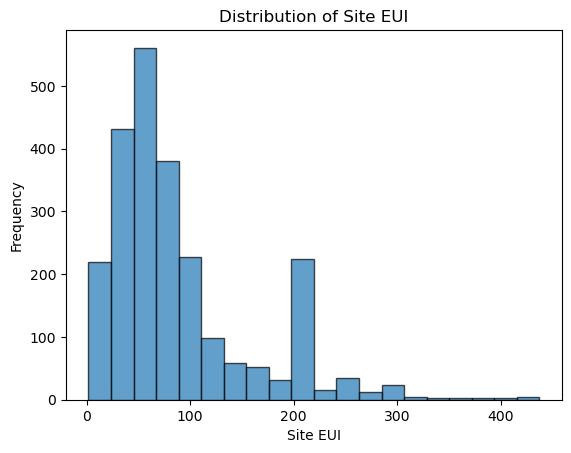

In [1463]:
# Create a histogram of Site EUI
plt.hist(phili_buildings_22_clean["site_eui_kbtuft2"], bins=20, edgecolor='k', alpha=0.7)
plt.title('Distribution of Site EUI')
plt.xlabel('Site EUI')
plt.ylabel('Frequency')


Text(0, 0.5, 'Frequency')

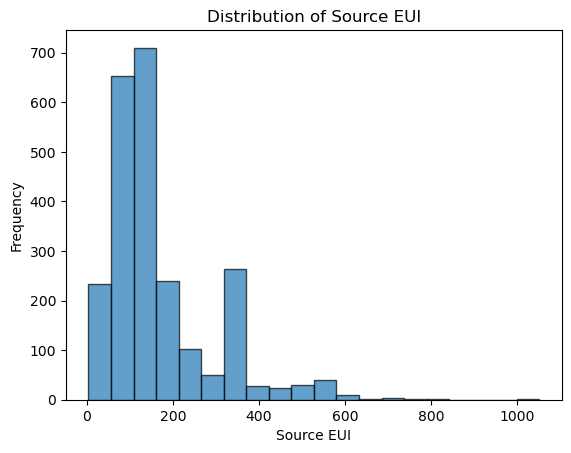

In [1465]:
# Create a histogram of Source EUI
plt.hist(phili_buildings_22_clean["source_eui_kbtuft2"], bins=20, edgecolor='k', alpha=0.7)
plt.title('Distribution of Source EUI')
plt.xlabel('Source EUI')
plt.ylabel('Frequency')

### Threshold Variable

In [1481]:
# Define size ranges (bins)
bins = [0, 1000, 5000, 10000, 20000, 50000, 100000, 200000, 300000,float('inf')]
labels = ['0-1k', '1k-5k', '5k-10k', '10k-20k', '20k-50k', '50k-100k','100k-200k','200k-300k', '300k+']

# Create a new column for size range
phili_buildings_22_clean['Size Range'] = pd.cut(phili_buildings_22_clean["total_floor_area_bld_pk_ft2"], bins=bins, labels=labels, right=False)

# Count buildings in each range
size_counts = phili_buildings_22_clean['Size Range'].value_counts().sort_index()

# Convert to a DataFrame for display
size_counts_table = size_counts.reset_index()
size_counts_table.columns = ['Size Range', 'Count']

size_counts_table


Size Range  Count
0       0-1k     81
1      1k-5k    121
2     5k-10k     76
3    10k-20k    289
4    20k-50k    270
5   50k-100k    855
6  100k-200k    361
7  200k-300k    154
8      300k+    182

In [1483]:
phili_buildings_22_clean.head()

objectid  data_year  portfolio_manager_id philadelphia_building_id  \
0         1       2022            23418185.0                            
1         2       2022             5921759.0                            
2         3       2022            22425337.0                782801101   
3         4       2022             6396423.0                884119600   
4         5       2022             3635022.0                            

    street_address                     property_name postal_code  \
0  3501 ISLAND AVE  Giant Carlisle #9232 (Warehouse)       19153   
1  330 W Oregon Av           Colligas Family Markets       19148   
2   1901 S 23RD ST                          McDaniel       19145   
3   777 MAYFAIR ST        CubeSmart - Mayfair Street       19124   
4    3501 CEDAR ST                         Kawin LLC       19134   

   num_of_buildings  year_built primary_prop_type_epa_calc  \
0               1.0      1987.0        Distribution Center   
1               1.0      1980.0  Supermarket/Grocery Store   
2               1.0      1937.0                K-12 School   
3               1.0      2005.0      Self-Storage Facility   
4               1.0      1983.0                 Strip Mall   

   total_floor_area_bld_pk_ft2  electric_use_kbtu  site_eui_kbtuft2  \
0                      84471.0          7332507.4             101.4   
1                      58696.0          7789780.2             235.8   
2                      61000.0          1358818.8              22.4   
3                      68479.0           385860.7              12.8   
4                      26130.5            64868.8               2.5   

   source_eui_kbtuft2  total_ghg_emissions_mtco2e      compliance_type  \
0               210.1                      915.80  Required Compliance   
1               479.9                     1000.10  Required Compliance   
2                62.5                      118.80  Required Compliance   
3                23.3                       59.70  Required Compliance   
4                 7.0                        5.85  Required Compliance   

  benchmarking_status Size Range  
0            Complied   50k-100k  
1            Complied   50k-100k  
2            Complied   50k-100k  
3            Complied   50k-100k  
4            Complied    20k-50k

In [1489]:
# Removing Outliers
cleans_2021 = phili_buildings_21[phili_buildings_21['SITE_EUI_KBTUFT2'] < 1000]
cleans_2020 = phili_buildings_20[phili_buildings_20['SITE_EUI_KBTUFT2'] < 1000]
cleans_2019 = phili_buildings_19[phili_buildings_19['SITE_EUI_KBTUFT2'] < 1000]
cleans_2022 = phili_buildings_22[phili_buildings_22['site_eui_kbtuft2'] < 1000]

In [1491]:
# Calculate  EUI means
phili_eui2022 = cleans_2022['site_eui_kbtuft2'].mean()
phili_eui2021 = cleans_2021['SITE_EUI_KBTUFT2'].mean()
phili_eui2020 = cleans_2020['SITE_EUI_KBTUFT2'].mean()
phili_eui2019 = cleans_2019['SITE_EUI_KBTUFT2'].mean()
# Electricity use means
p_elec2022 = cleans_2022['electric_use_kbtu'].mean()
p_elec2021 = cleans_2021['ELECTRIC_USE_KBTU'].mean()
p_elec2020 = cleans_2020['ELECTRICITY_USE_KBTU'].mean()
p_elec2019 = cleans_2019['ELECTRICITY_USE_KBTU'].mean()

In [1493]:
# Create frame for plotting
philigraph = pd.DataFrame({
    'years': [2019, 2020, 2021, 2022],
    'values': [phili_eui2019, phili_eui2020, phili_eui2021, phili_eui2022],
    'values_elec': [p_elec2019, p_elec2020, p_elec2021, p_elec2022]
})

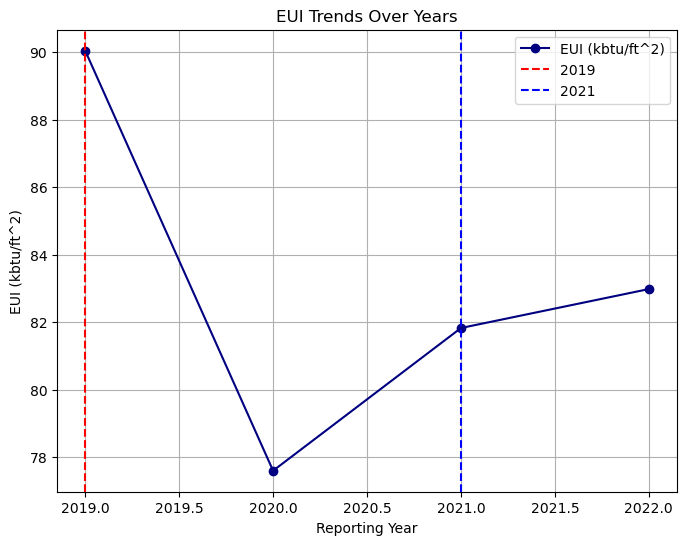

In [1495]:
# Plot EUI trends
plt.figure(figsize=(8, 6))
plt.plot(philigraph['years'], philigraph['values'], marker='o', label='EUI (kbtu/ft^2)', color='navy')
plt.axvline(x=2019, color='red', linestyle='--', label='2019')
plt.axvline(x=2021, color='blue', linestyle='--', label='2021')
plt.title('EUI Trends Over Years')
plt.xlabel('Reporting Year')
plt.ylabel('EUI (kbtu/ft^2)')
plt.legend()
plt.grid()

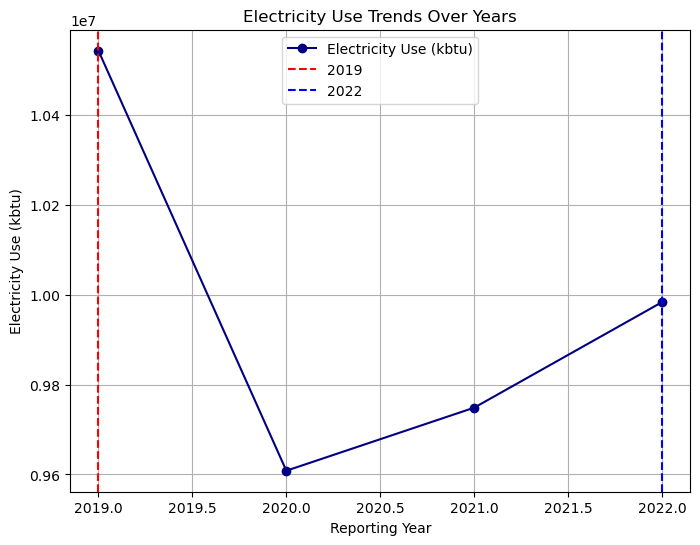

In [1497]:
# Plot electricity use trends
plt.figure(figsize=(8, 6))
plt.plot(philigraph['years'], philigraph['values_elec'], marker='o', label='Electricity Use (kbtu)', color='navy')
plt.axvline(x=2019, color='red', linestyle='--', label='2019')
plt.axvline(x=2022, color='blue', linestyle='--', label='2022')
plt.title('Electricity Use Trends Over Years')
plt.xlabel('Reporting Year')
plt.ylabel('Electricity Use (kbtu)')
plt.legend()
plt.grid()

In [1499]:
# Rename columns
phili_buildings = phili_buildings_22_clean.rename(columns={
    'total_floor_area_bld_pk_ft2': 'floor_area',
    'objectid': 'building_id',
    'primary_prop_type_epa_calc': 'building_type',
    'electric_use_kbtu': 'electricity_use',
    'site_eui_kbtuft2': 'site_eui',
    'source_eui_kbtuft2': 'source_eui',
    'total_ghg_emissions_mtco2e': 'total_ghg'
})

In [1501]:
# Select and filter data
phili_data = phili_buildings[[
    'building_id', 'year_built', 'building_type', 'floor_area',
    'electricity_use', 'site_eui', 'source_eui', 'total_ghg', 'compliance_type', 'benchmarking_status'
]]
phili_data_clean = phili_data[
    (phili_data['compliance_type'] == 'Required Compliance') & (phili_data['year_built'] < 2018)
]

In [1503]:
# Save cleaned data
phili_data_clean.to_excel('/Users/chrismesfin/Desktop/Building Performance Paper/Raw_Data/Cleaned Sets/phili_data_clean.xlsx', index=False)
phili_data_clean.to_stata("/Users/chrismesfin/Desktop/Building Performance Paper/Raw_Data/Cleaned Sets/philidelphia.dta", write_index=False)
phili_data_clean.to_csv("/Users/chrismesfin/Desktop/Building Performance Paper/Raw_Data/Cleaned Sets/phili_data_clean.csv", index=False)

/var/folders/l6/f5b9_49s4vz8s06ykmy325cr0000gn/T/ipykernel_60976/314164798.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=filtered_buildings, x='building_type', order=filtered_buildings['building_type'].value_counts().index, palette='pastel')


([0, 1, 2, 3, 4],
 [Text(0, 0, 'Multifamily Housing'),
  Text(1, 0, 'College/University'),
  Text(2, 0, 'K-12 School'),
  Text(3, 0, 'Office'),
  Text(4, 0, 'Municipal')])

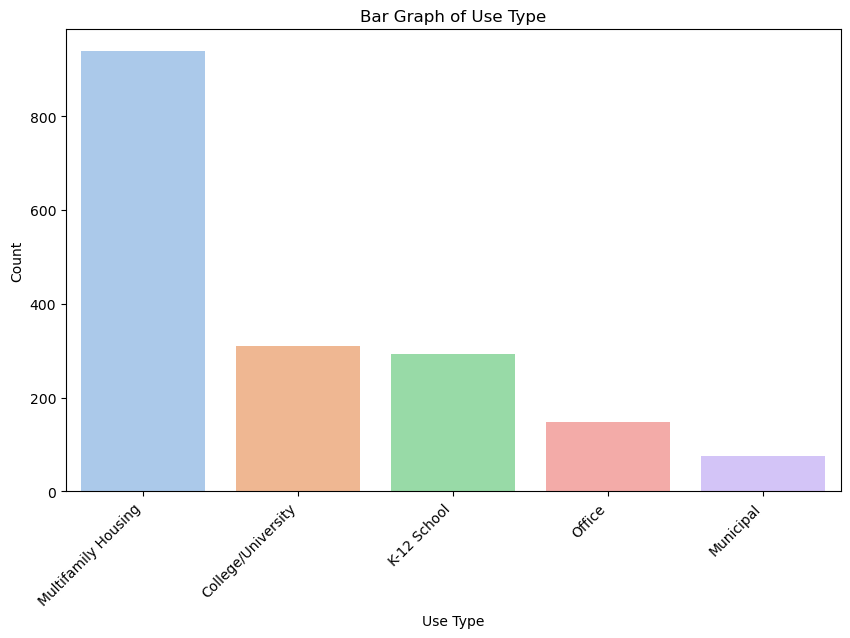

In [1505]:
# Bar plot for building types
filtered_buildings = phili_buildings[
    phili_buildings['building_type'].isin(["Multifamily Housing", "K-12 School", "Office", "College/University", "Municipal"])
]

plt.figure(figsize=(10, 6))
sns.countplot(data=filtered_buildings, x='building_type', order=filtered_buildings['building_type'].value_counts().index, palette='pastel')
plt.title('Bar Graph of Use Type')
plt.xlabel('Use Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')

